In [1]:
import os
os.environ['HF_HOME'] = "/workspaces/LLM/huggingface_cache"
cache_dir = "/workspaces/LLM/huggingface_cache"

In [2]:
from transformers import file_utils

# ÁèæÂú®„ÅÆ„Ç≠„É£„ÉÉ„Ç∑„É•„Éá„Ç£„É¨„ÇØ„Éà„É™„ÇíÂèñÂæó
cache_dir = file_utils.default_cache_path
print(f"Current HuggingFace cache directory: {cache_dir}")

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Current HuggingFace cache directory: /workspaces/LLM/huggingface_cache/transformers


In [3]:
# !pip install japanize-matplotlib

In [4]:
from transformers.trainer_utils import set_seed
# ‰π±Êï∞„Ç∑„Éº„Éâ„ÅÆÂõ∫ÂÆö
set_seed(42)

In [5]:
### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô
from pprint import pprint
from datasets import load_dataset

# HuggingFaceHub„ÅÆllm-book/JGLUE„ÅÆ„É™„Éù„Ç∏„Éà„É™„Åã„Çâ
# MARC-ja„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÇÄ
train_dataset = load_dataset(
    "llm-book/wrime-sentiment", name="MARC-ja", split="train"
)
valid_dataset = load_dataset(
    "llm-book/wrime-sentiment", name="MARC-ja", split="validation"
)
# pprint„ÅßË¶ã„ÇÑ„Åô„Åè„Åô„Çã
pprint(train_dataset[0])


Using custom data configuration MARC-ja
Reusing dataset wrime-sentiment (/workspaces/LLM/huggingface_cache/datasets/llm-book___wrime-sentiment/MARC-ja/0.0.0/c49a65171c421f2ae4dd3db82595f499cf0d289ca6780a2aeddf710f22dd8a37)
Using custom data configuration MARC-ja
Reusing dataset wrime-sentiment (/workspaces/LLM/huggingface_cache/datasets/llm-book___wrime-sentiment/MARC-ja/0.0.0/c49a65171c421f2ae4dd3db82595f499cf0d289ca6780a2aeddf710f22dd8a37)


{'datetime': '2012/7/31 23:48',
 'label': 1,
 'sentence': '„Åº„Åë„Å£„Å®„Åó„Å¶„Åü„Çâ„Åì„Çì„Å™ÊôÇÈñì„ÄÇ„ÉÅ„É£„É™„ÅÇ„Çã„Åã„ÇâÈ£ü„Åπ„Å´„Åß„Åü„ÅÑ„ÅÆ„Å´‚Ä¶',
 'user_id': 1}


In [6]:
pprint(train_dataset.features)

{'datetime': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=2, names=['positive', 'negative'], id=None),
 'sentence': Value(dtype='string', id=None),
 'user_id': Value(dtype='int64', id=None)}


### „Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Éº

In [7]:
# !pip install transformers[ja,sentencepice]

In [8]:
from transformers import AutoTokenizer

# HuggingFaceHub‰∏ä„ÅÆ„É¢„Éá„É´Âêç„ÇíÊåáÂÆö
model_name = "tohoku-nlp/bert-base-japanese-v3"
# „É¢„Éá„É´Âêç„Åã„Çâ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÇíË™≠„ÅøËæº„ÇÄ
tokenizer = AutoTokenizer.from_pretrained(model_name)
print(type(tokenizer).__name__)

BertJapaneseTokenizer


In [9]:
tokenizer.tokenize("„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô")

['„Åì„Çå', '„ÅØ', '„ÉÜ„Çπ„Éà', '„Åß„Åô']

In [10]:
encoded_input = tokenizer("„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô„ÄÇ")
# Âá∫Âäõ„Åï„Çå„Åü„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÅÆ„ÇØ„É©„Çπ„ÇíË°®Á§∫
print(type(encoded_input).__name__)

BatchEncoding


In [11]:
pprint(encoded_input)

{'attention_mask': [1, 1, 1, 1, 1, 1, 1],
 'input_ids': [2, 12538, 465, 14985, 13037, 385, 3],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0]}


In [12]:
# ÁâπÊÆä„Éà„Éº„ÇØ„É≥„ÅÆÁ¢∫Ë™ç
tokenizer.convert_ids_to_tokens(encoded_input["input_ids"])

['[CLS]', '„Åì„Çå', '„ÅØ', '„ÉÜ„Çπ„Éà', '„Åß„Åô', '„ÄÇ', '[SEP]']

### „Éá„Éº„Çø„Çª„ÉÉ„ÉàÁµ±Ë®à„ÅÆÂèØË¶ñÂåñ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20149/20149 [00:05<00:00, 3794.49it/s]


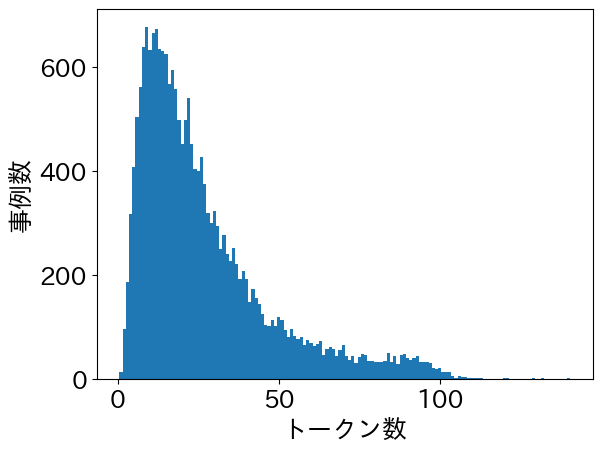

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1608/1608 [00:00<00:00, 3643.89it/s]


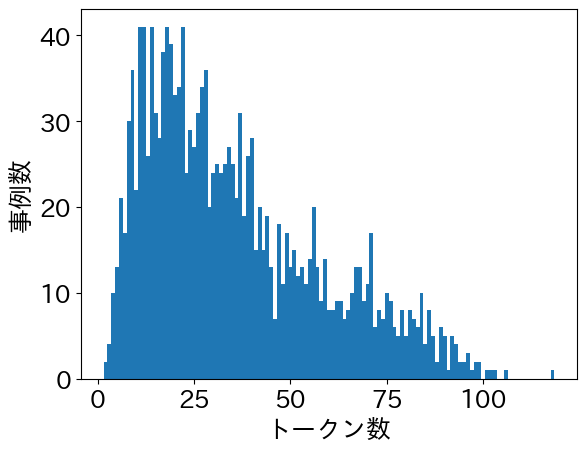

In [17]:
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from datasets import Dataset
from tqdm import tqdm

plt.rcParams["font.size"] = 18

def visualize_text_length(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆ„Éà„Éº„ÇØ„É≥Êï∞„ÅÆÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆÈï∑„Åï„ÇíÊï∞„Åà„Çã
    length_counter = Counter()
    for data in tqdm(dataset):
        length = len(tokenizer.tokenize(data["sentence"]))
        length_counter[length] += 1
    # length_counter„ÅÆÂÄ§„Åã„ÇâÊ£í„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã
    plt.bar(length_counter.keys(), length_counter.values(), width=1.0)
    plt.xlabel("„Éà„Éº„ÇØ„É≥Êï∞")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_text_length(train_dataset)
visualize_text_length(valid_dataset)

In [18]:
# „É¨„Éì„É•„ÉºÂÜÖÂÆπ„Çµ„É≥„Éó„É´Á¢∫Ë™ç
for data in valid_dataset:
    if len(tokenizer.tokenize(data["sentence"])) < 10:
        pprint(data)

{'datetime': '2020/5/15 17:35',
 'label': 1,
 'sentence': '„Çà„Åè„Çè„Åã„Çâ„Å™„ÅÑÈÄ£Êê∫„ÄÇ',
 'user_id': 26}
{'datetime': '2020/5/15 17:47',
 'label': 1,
 'sentence': '„Åì„ÅÆ3Âπ¥„ÅåÁÑ°ÈßÑ„Å´„Å™„Å£„Åü„ÄÇ',
 'user_id': 26}
{'datetime': '2020/5/15 17:48',
 'label': 1,
 'sentence': 'Á©∫Ê∞ó„ÇíË™≠„Çì„Åß„Å™„Åè„Å¶„ÄÇ',
 'user_id': 26}
{'datetime': '2020/5/15 17:52',
 'label': 1,
 'sentence': '„Å£„Å¶„ÅÑ„ÅÜ„Åã„ÄÅËã±Ë™û„ÅÆËÅû„Åç„Åô„Åé',
 'user_id': 26}
{'datetime': '2020/5/18 16:31',
 'label': 0,
 'sentence': 'ÊòéÊó•„ÅØÊ•Ω„Åó„Åø„Åã„ÇÇ„ÄÇ',
 'user_id': 26}
{'datetime': '2020/5/19 11:55',
 'label': 1,
 'sentence': '‰ªäÊó•„ÅØË™§Â≠ó„Å†„Çâ„Åë„ÄÇ',
 'user_id': 26}
{'datetime': '2020/5/21 8:29',
 'label': 0,
 'sentence': 'SUN„Åå„ÅÑ„ÅÑ„Å™„Å®ÊÄù„Å£„Åü„ÄÇ',
 'user_id': 26}
{'datetime': '2020/5/5 6:50',
 'label': 0,
 'sentence': '„Çè„Åï„Å≥ÈÜ§Ê≤π„ÄÅÁµêÊßãÂêà„ÅÜ„ÄÇ',
 'user_id': 28}
{'datetime': '2020/5/6 6:13',
 'label': 1,
 'sentence': 'Êúù„Åã„ÇâÊú¨ÂΩì„Å´ËÖπÁ´ã„Åü„Åó„ÅÑ„ÄÇ',
 'user_id': 28}
{'datetime': '202

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20149/20149 [00:01<00:00, 15501.33it/s]


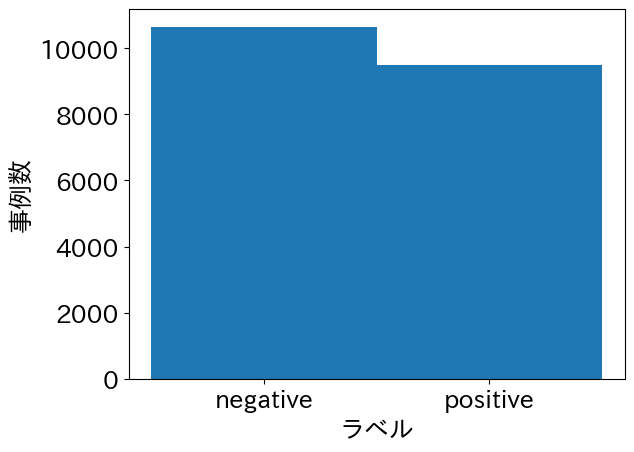

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1608/1608 [00:00<00:00, 15332.39it/s]


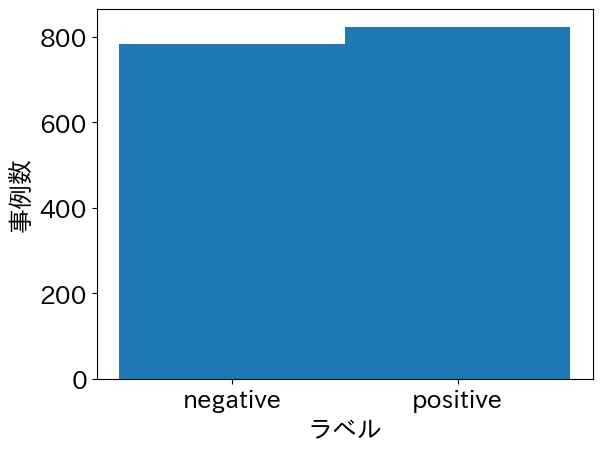

In [19]:
# „É©„Éô„É´„ÅÆÂàÜÂ∏ÉÁ¢∫Ë™ç
def  visualize_label(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„É©„Éô„É´ÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„É©„Éô„É´„ÅÆÊï∞„ÇíÊï∞„Åà„Çã
    label_counter = Counter()
    for data in tqdm(dataset):
        label_id = data["label"]
        label_name = dataset.features["label"].names[label_id]
        label_counter[label_name] += 1
    # label_counter„ÇíÊ£í„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª„Åô„Çã
    plt.bar(label_counter.keys(), label_counter.values(), width=1.0)
    plt.xlabel("„É©„Éô„É´")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_label(train_dataset)
visualize_label(valid_dataset)

### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÂâçÂá¶ÁêÜ

In [20]:
from transformers import BatchEncoding

def preprocess_text_classification(
    example: dict[str, str | int]
) -> BatchEncoding:
    """ÊñáÁ´†ÂàÜÈ°û„ÅÆ‰∫ã‰æã„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„Çí„Éà„Éº„ÇØ„Éä„Ç§„Ç∫„Åó„ÄÅID„Å´Â§âÊèõ"""
    encoded_example = tokenizer(example["sentence"], max_length=512)
    # „É¢„Éá„É´„ÅÆÂÖ•ÂäõÂºïÊï∞„Åß„ÅÇ„Çã"labels"„Çí„Ç≠„Éº„Å®„Åó„Å¶Ê†ºÁ¥ç„Åô„Çã
    encoded_example["labels"] = example["label"]
    return encoded_example

In [21]:
# „Éá„Éº„Çø„Çª„ÉÉ„ÉàÂÖ®‰Ωì„Çí„Éà„Éº„ÇØ„Éä„Ç§„Çº„Éº„Ç∑„Éß„É≥
encoded_train_dataset = train_dataset.map(
    preprocess_text_classification,
    remove_columns=train_dataset.column_names
)
encoded_valid_dataset = valid_dataset.map(
    preprocess_text_classification,
    remove_columns=valid_dataset.column_names
)

Loading cached processed dataset at /workspaces/LLM/huggingface_cache/datasets/llm-book___wrime-sentiment/MARC-ja/0.0.0/c49a65171c421f2ae4dd3db82595f499cf0d289ca6780a2aeddf710f22dd8a37/cache-25b9488f706c3063.arrow
Loading cached processed dataset at /workspaces/LLM/huggingface_cache/datasets/llm-book___wrime-sentiment/MARC-ja/0.0.0/c49a65171c421f2ae4dd3db82595f499cf0d289ca6780a2aeddf710f22dd8a37/cache-1852e9b08f832331.arrow


In [22]:
pprint(encoded_train_dataset[0])

{'attention_mask': [1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1],
 'input_ids': [2,
               478,
               7139,
               15269,
               441,
               456,
               13123,
               21311,
               12671,
               385,
               12651,
               7065,
               12485,
               12488,
               13781,
               461,
               457,
               13030,
               464,
               461,
               29,
          

### „Éü„Éã„Éê„ÉÉ„ÉÅÊßãÁØâ

In [23]:
# „Éü„Éã„Éê„ÉÉ„ÉÅ„Å®„Éë„Éá„Ç£„É≥„Ç∞„ÅÆÂÆüË£Ö
from transformers import DataCollatorWithPadding

data_collaor = DataCollatorWithPadding(tokenizer=tokenizer) # „Éë„Éá„Ç£„É≥„Ç∞„Å´Áî®„ÅÑ„Çã„ÉÄ„Éü„Éº„ÅÆ„Éà„Éº„ÇØ„É≥ID„ÇíÂèñÂæó„Åô„Çã„Åü„ÇÅ

In [24]:
# data_collator„ÅÆÊåôÂãïÁ¢∫Ë™ç
batch_inputs = data_collaor(encoded_train_dataset[0:4])
pprint({name: tensor.size() for name, tensor in batch_inputs.items()})

{'attention_mask': torch.Size([4, 36]),
 'input_ids': torch.Size([4, 36]),
 'labels': torch.Size([4]),
 'token_type_ids': torch.Size([4, 36])}


### „É¢„Éá„É´„ÅÆÊ∫ñÂÇô

In [25]:
from transformers import AutoModelForSequenceClassification

class_label = train_dataset.features["label"]
label2id = {label: id for id, label in enumerate(class_label.names)}
id2label = {id: label for id, label in enumerate(class_label.names)}
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=class_label.num_classes, 
    label2id=label2id, # „É©„Éô„É´Âêç„Åã„ÇâID„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
    id2label=id2label # ID„Åã„Çâ„É©„Éô„É´„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
)
print(type(model).__name__)

Some weights of the model checkpoint at tohoku-nlp/bert-base-japanese-v3 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

BertForSequenceClassification


In [26]:
# forward
print(model.forward(**data_collaor(encoded_train_dataset[0:4])))

SequenceClassifierOutput(loss=tensor(0.7499, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.0755,  0.1869],
        [ 0.3045,  0.0093],
        [ 0.4099, -0.2517],
        [ 0.3643,  0.2986]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


### Ë®ìÁ∑¥„ÅÆÂÆüÊñΩ

In [27]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="output_marc_ja", # ÁµêÊûú‰øùÂ≠ò„ÅÆ„Éï„Ç©„É´„ÉÄ
    per_device_train_batch_size=32, # Ë®ìÁ∑¥ÊôÇ„ÅÆ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
    per_device_eval_batch_size=32, # Ë©ï‰æ°ÊôÇ„ÅÆ„Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫
    learning_rate=2e-5, # Â≠¶ÁøíÁéá
    lr_scheduler_type="linear", # Â≠¶ÁøíÁéá„Çπ„Ç±„Ç∏„É•„Éº„É©„Éº„ÅÆÁ®ÆÈ°û
    warmup_ratio=0.1, # Â≠¶ÁøíÁéá„ÅÆ„Ç¶„Ç©„Éº„É†„Ç¢„ÉÉ„Éó„ÅÆÈï∑„Åï„ÇíÊåáÂÆö
    num_train_epochs=3, # „Ç®„Éù„ÉÉ„ÇØÊï∞
    save_strategy="epoch", # „ÉÅ„Çß„ÉÉ„ÇØ„Éù„Ç§„É≥„Éà„ÅÆ‰øùÂ≠ò„Çø„Ç§„Éü„É≥„Ç∞
    logging_strategy="epoch", # „É≠„ÇÆ„É≥„Ç∞„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞
    evaluation_strategy="epoch", # Ê§úË®º„Çª„ÉÉ„Éà„Å´„Çà„ÇãË©ï‰æ°„ÅÆ„Çø„Ç§„Éü„É≥„Ç∞
    load_best_model_at_end=True, # Ë®ìÁ∑¥Âæå„Å´ÈñãÁô∫„Çª„ÉÉ„Éà„ÅßÊúÄËâØ„É¢„Éá„É´„Çí„É≠„Éº„Éâ
    metric_for_best_model="accuracy", # ÊúÄËâØ„É¢„Éá„É´„ÇíÊ±∫ÂÆö„Åô„ÇãË©ï‰æ°ÊåáÊ®ô
    fp16=True, # Ëá™ÂãïÊ∑∑ÂêàÁ≤æÂ∫¶ÊºîÁÆó„ÅÆÊúâÂäπÂåñ
)

In [28]:
# „É¢„Éá„É´Ë©ï‰æ°ÊñπÊ≥ï„ÅÆÂÆöÁæ©
import numpy as np

def compute_accuracy(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, float]:
    """‰∫àÊ∏¨„É©„Éô„É´„Å®Ê≠£Ëß£„É©„Éô„É´„Åã„ÇâÊ≠£Ëß£Áéá„ÇíË®àÁÆó"""
    predictions, labels = eval_pred
    # predictions„ÅØÂêÑ„É©„Éô„É´„Å´„Å´„Å§„ÅÑ„Å¶„ÅÆ„Çπ„Ç≥„Ç¢
    # ÊúÄ„ÇÇ„Çπ„Ç≥„Ç¢„ÅÆÈ´ò„ÅÑ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰∫àÊ∏¨„É©„Éô„É´„Å®„Åô„Çã
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).mean()}

In [29]:
# Â≠¶Áøí„ÅÆÈñãÂßã
from transformers import Trainer

trainer = Trainer(
    model=model,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_valid_dataset,
    data_collator=data_collaor,
    args=training_args,
    compute_metrics=compute_accuracy,
)
trainer.train()

Using cuda_amp half precision backend
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 20149
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1890


***** Running Evaluation *****
  Num examples = 1608
  Batch size = 32
Saving model checkpoint to output_marc_ja/checkpoint-630
Configuration saved in output_marc_ja/checkpoint-630/config.json
Model weights saved in output_marc_ja/checkpoint-630/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1608
  Batch size = 32
Saving model checkpoint to output_marc_ja/checkpoint-1260
Configuration saved in output_marc_ja/checkpoint-1260/config.json
Model weights saved in output_marc_ja/checkpoint-1260/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1608
  Batch size = 32
Saving model checkpoint to output_marc_ja/checkpoint-1890
Configuration saved in output_marc_ja/checkpoint-1890/config.json
Model weights saved in output_marc_ja/checkpoint-1890/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from output_marc_ja/checkpoint-1890 (score: 0.9421641791044776).


TrainOutput(global_step=1890, training_loss=0.17051666098296958, metrics={'train_runtime': 187.8866, 'train_samples_per_second': 321.721, 'train_steps_per_second': 10.059, 'total_flos': 2736062573028180.0, 'train_loss': 0.17051666098296958, 'epoch': 3.0})

### Ë®ìÁ∑¥Âæå„ÅÆ„É¢„Éá„É´Ë©ï‰æ°

In [30]:
# Ê§úË®º„Çª„ÉÉ„Éà„Åß„É¢„Éá„É´Ë©ï‰æ°
eval_metrics = trainer.evaluate(encoded_valid_dataset)
pprint(eval_metrics)

***** Running Evaluation *****
  Num examples = 1608
  Batch size = 32


{'epoch': 3.0,
 'eval_accuracy': 0.9421641791044776,
 'eval_loss': 0.23656997084617615,
 'eval_runtime': 1.4448,
 'eval_samples_per_second': 1112.961,
 'eval_steps_per_second': 35.299}


## ÊÑüÊÉÖÂàÜÊûê„É¢„Éá„É´„ÅÆ„Ç®„É©„ÉºÂàÜÊûê

### „É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÅÆÂèñÂæó

In [2]:
import torch
device = 0 if torch.cuda.is_available() else -1
device

0

In [44]:
from transformers import pipeline

import torch
device = 0 if torch.cuda.is_available() else -1

model_name = "llm-book/bert-base-japanese-v3-wrime-sentiment"
sentiment_pipeline = pipeline(model=model_name, device=device)

loading configuration file https://huggingface.co/llm-book/bert-base-japanese-v3-wrime-sentiment/resolve/main/config.json from cache at /workspaces/LLM/huggingface_cache/transformers/d017da05388cb51a002e5f5e997a0deb642aeab41b7abe15fa569542bdcb03b9.fc6acbaccc6ba34b5fa5e1741a66f105ebf02c89a21234678ab24deb1f65b769
Model config BertConfig {
  "_name_or_path": "llm-book/bert-base-japanese-v3-wrime-sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "positive",
    "1": "negative"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 1,
    "positive": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "p

In [42]:
# „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆË™≠„ÅøËæº„Åø
from datasets import load_dataset

valid_dataset = load_dataset("llm-book/wrime-sentiment", split="validation")

W1014 09:08:01.500471 140004139278336 builder.py:463] Using custom data configuration default


Dataset wrime-sentiment downloaded and prepared to /workspaces/LLM/huggingface_cache/datasets/llm-book___wrime-sentiment/default/0.0.0/c49a65171c421f2ae4dd3db82595f499cf0d289ca6780a2aeddf710f22dd8a37. Subsequent calls will reuse this data.


In [45]:
from tqdm import tqdm

# „ÇØ„É©„ÇπÂêç„ÅÆÊÉÖÂ†±„ÇíÂèñÂæó„Åô„Çã„Åü„ÇÅ„ÅÆClassLabel„Ç§„É≥„Çπ„Çø„É≥„Çπ
class_label = valid_dataset.features["label"]

results: list[dict[str, float | str]] = []
for i, example in tqdm(enumerate(valid_dataset)):
    # „É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÇíÂèñÂæó
    model_prediction = sentiment_pipeline(example["sentence"])[0]
    # Ê≠£Ëß£„É©„Éô„É´ID„Çí„É©„Éô„É´Âêç„Å´Â§âÊõ¥
    true_label = class_label.int2str(example["label"])
    
    # result„Å´ÂàÜÊûê„Å´ÂøÖË¶Å„Å™ÊÉÖÂ†±„ÇíÊ†ºÁ¥ç
    results.append(
        {
            "example_id": i,
            "pred_prob": model_prediction["score"],
            "pred_label": model_prediction["label"],
            "true_label": true_label,
        }
    )
    

8it [00:00, 25.39it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1036: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
1608it [00:15, 103.51it/s]


### ÂÖ®‰ΩìÁöÑ„Å™ÂÇæÂêë„ÅÆÂàÜÊûê

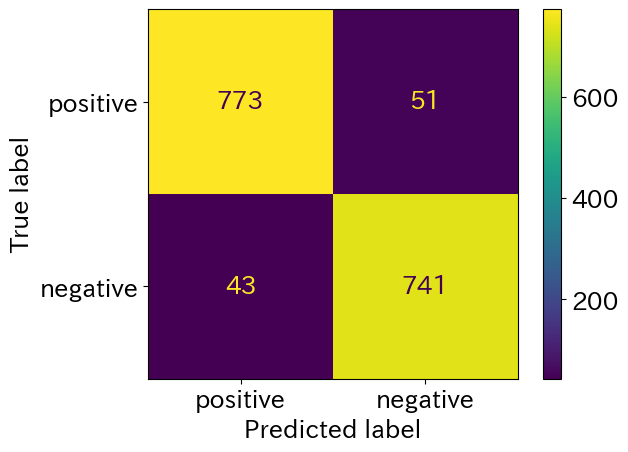

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

plt.rcParams["font.size"] = 18

# Ê∑∑ÂêàË°åÂàó„ÅÆ‰ΩúÊàê
confusion_matrix = confusion_matrix(
    y_true=[result["true_label"] for result in results],
    y_pred=[result["pred_label"] for result in results],
    labels=class_label.names,
)
# Ê∑∑ÂêàË°åÂàó„ÇíÁîªÂÉè„Çí„Åó„Å¶Ë°®Á§∫
ConfusionMatrixDisplay(
    confusion_matrix, display_labels=class_label.names
).plot()

### „É¢„Éá„É´„ÅÆ„Ç∑„Éß„Éº„Éà„Ç´„ÉÉ„Éà„Å´Ê≥®ÊÑè

In [49]:
# ‰∫àÊ∏¨„ÅåË™§„Å£„Åü‰∫ã‰æã„ÇíÂèéÈõÜ
failed_results = [
    res for res in results if res["pred_label"] != res["true_label"]
]
# „É¢„Éá„É´„ÅÆ‰∫àÊ∏¨Á¢∫Áéá„ÅåÈ´ò„ÅÑÈ†Ü„Å´„ÇΩ„Éº„Éà
sorted_failed_results = sorted(
    failed_results, key=lambda x: -x["pred_prob"]
)
# È´ò„ÅÑÁ¢∫Áéá„Åß‰∫àÊ∏¨„Åó„Å™„Åå„ÇâË™§„Å£„Åü‰∫ã‰æã„ÅÆ‰∏ä‰Ωç2‰ª∂„ÇíË°®Á§∫
for top_result in sorted_failed_results[:5]:
    review_text = valid_dataset[top_result["example_id"]]["sentence"]
    print(f"„É¨„Éì„É•„ÉºÊñá: {review_text}")
    print(f"‰∫àÊ∏¨: {top_result['pred_label']}")
    print(f"Ê≠£Ëß£: {top_result['true_label']}")
    print(f"‰∫àÊ∏¨Á¢∫Áéá: {top_result['pred_prob']:.4f}")
    print("-------------")

„É¨„Éì„É•„ÉºÊñá: ‰Ωï„ÅÆ„Åì„Çå„Åó„Åç‰ºöÁ§æÂì°„Å†„Å£„ÅüÈ†É„ÅÆËæõ„Åï„Å´ÊØî„Åπ„Çå„Å∞„ÄÇ„Åæ„ÅÇÁ®ÆÈ°û„ÅåÈÅï„ÅÜ„Åë„Å©„ÄÇ


‰∫àÊ∏¨: negative
Ê≠£Ëß£: positive
‰∫àÊ∏¨Á¢∫Áéá: 0.9993
-------------
„É¨„Éì„É•„ÉºÊñá: ‰ªäÂπ¥„ÅÆ„Éó„É™„Ç≠„É•„Ç¢„ÅÆÊ±∫„ÇÅÂè∞Ë©û„Åå„ÄÅ
 
„Äå„ÅäÂ§ß‰∫ã„Å´„Äç

‰ªäÂπ¥„Å´„Éû„ÉÉ„ÉÅ„É≥„Ç∞„ÅóÈÅé„Åé„Å¶„Å¶„ÄÅ„Éó„É™„Ç≠„É•„Ç¢„Çπ„Çø„ÉÉ„Éï„ÅÆÂÖàË¶ã„ÅÆÊòé„Åå„Åô„ÅîÈÅé„Åé„Çã„Åó„ÄÅ‰Ωï„ÅåË®Ä„ÅÑ„Åü„ÅÑ„Åã„Å®Ë®Ä„ÅÜ„Å®Â§âË∫´„Åô„ÇãÊ£í„ÇíË≤∑„Çè„Åï„Çå„Åæ„Åó„Åü„ÄÇ
‰∫àÊ∏¨: positive
Ê≠£Ëß£: negative
‰∫àÊ∏¨Á¢∫Áéá: 0.9993
-------------
„É¨„Éì„É•„ÉºÊñá: „ÉÑ„Ç§„ÉÉ„Çø„ÉºÊó©ÊúùÈÉ®„ÄÅ„ÅÑ„Åè„Çè„ÇàÔºÅÔºÅ „ÅÇ„Å®Ë´∏‰∫ãÊÉÖ„Å´„Çà„ÇäÊï∞‰∫∫„Éñ„É≠„ÉÉ„ÇØ„Åï„Åõ„Å¶È†Ç„Åç„Åæ„Åó„Åü‚Ä¶Áî≥„ÅóË®≥„Å™„ÅÑ‚Ä¶‚Ä¶
‰∫àÊ∏¨: negative
Ê≠£Ëß£: positive
‰∫àÊ∏¨Á¢∫Áéá: 0.9992
-------------
„É¨„Éì„É•„ÉºÊñá: ÈÖí„ÅØ„Å¨„Çã„ÇÅ„ÅÆ Ááó„Åå„ÅÑ„ÅÑ ËÇ¥„ÅØÁÇô„Å£„Åü „Ç§„Ç´„Åß„ÅÑ„ÅÑ‚Üê„ÇÇ„Å£„Å®„ÅÑ„ÅÑ„ÇÇ„ÅÆÈ£ü„Åà„Çà
‰∫àÊ∏¨: positive
Ê≠£Ëß£: negative
‰∫àÊ∏¨Á¢∫Áéá: 0.9992
-------------
„É¨„Éì„É•„ÉºÊñá: „Åß„Åç„Çå„Å∞‰ªä„Åô„Åê„ÅäÁ∑öÈ¶ô„ÅÇ„Åí„Å´„ÅÑ„Åç„Åü„ÅÑ
‰∫

### Ëá™ÁÑ∂Ë®ÄË™ûÊé®Ë´ñ

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô

In [5]:
from pprint import pprint
from datasets import load_dataset

# Hugging Face Hub‰∏ä„ÅÆllm-book/JGLUE„ÅÆ„É™„Éù„Ç∏„Éà„É™„Åã„Çâ
# JNLI„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíË™≠„ÅøËæº„ÇÄ
train_dataset = load_dataset(
    "llm-book/JGLUE", name="JNLI", split="train"
)
valid_dataset = load_dataset(
    "llm-book/JGLUE", name="JNLI", split="validation"
)
pprint(train_dataset[0])

Reusing dataset jglue (/workspaces/LLM/huggingface_cache/datasets/llm-book___jglue/JNLI/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f)
Reusing dataset jglue (/workspaces/LLM/huggingface_cache/datasets/llm-book___jglue/JNLI/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f)


{'label': 2,
 'sentence1': '‰∫å‰∫∫„ÅÆÁî∑ÊÄß„Åå„Ç∏„É£„É≥„Éú„Ç∏„Çß„ÉÉ„ÉàÊ©ü„ÇíË¶ã„Å¶„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence2': '2‰∫∫„ÅÆÁî∑ÊÄß„Åå„ÄÅÁôΩ„ÅÑÈ£õË°åÊ©ü„ÇíÁú∫„ÇÅ„Å¶„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence_pair_id': '0',
 'yjcaptions_id': '100124-104404-104405'}


In [6]:
pprint(train_dataset.features)

{'label': ClassLabel(num_classes=3,
                     names=['entailment', 'contradiction', 'neutral'],
                     id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'sentence_pair_id': Value(dtype='string', id=None),
 'yjcaptions_id': Value(dtype='string', id=None)}


#### „Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Éº

In [7]:
from transformers import AutoTokenizer

# Hugging Face Hub‰∏ä„ÅÆ„É¢„Éá„É´Âêç„ÇíÊåáÂÆö
model_name = "tohoku-nlp/bert-base-japanese-v3"
# „É¢„Éá„É´Âêç„Åã„Çâ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Éº„ÇíË™≠„ÅøËæº„ÇÄ
tokenizer = AutoTokenizer.from_pretrained(model_name)

#### „Éá„Éº„Çø„Çª„ÉÉ„ÉàÁµ±Ë®à„ÅÆÂèØË¶ñÂåñ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20073/20073 [00:05<00:00, 3514.88it/s]


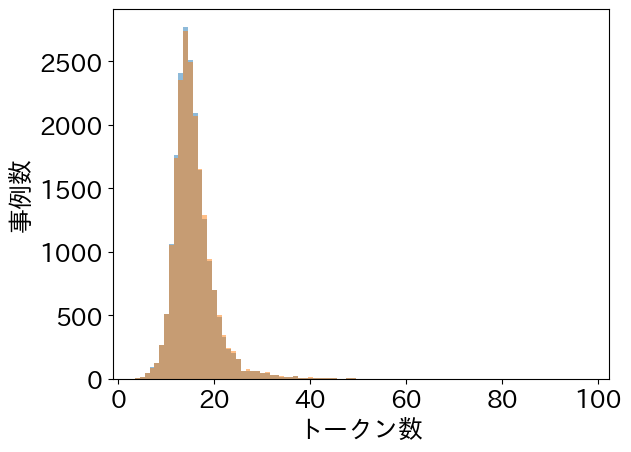

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2434/2434 [00:00<00:00, 3884.38it/s]


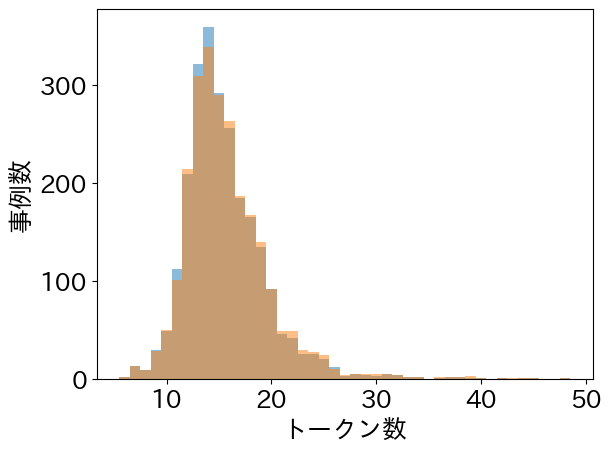

In [8]:
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from datasets import Dataset
from tqdm import tqdm

plt.rcParams["font.size"] = 18

def visualize_text_length(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆ„Éà„Éº„ÇØ„É≥Êï∞„ÅÆÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆÈï∑„Åï„ÇíÊï¥„Åà„Çã
    length_counter1 = Counter()
    length_counter2 = Counter()
    for data in tqdm(dataset):
        length1 = len(tokenizer.tokenize(data["sentence1"]))
        length_counter1[length1] += 1
        length2 = len(tokenizer.tokenize(data["sentence2"]))
        length_counter2[length2] += 1
    # length_counter„ÅÆÂÄ§„Åã„ÇâÊ£í„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã
    plt.bar(length_counter1.keys(), length_counter1.values(), width=1.0, alpha=0.5)
    plt.bar(length_counter2.keys(), length_counter2.values(), width=1.0, alpha=0.5)
    plt.xlabel("„Éà„Éº„ÇØ„É≥Êï∞")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_text_length(train_dataset)
visualize_text_length(valid_dataset)

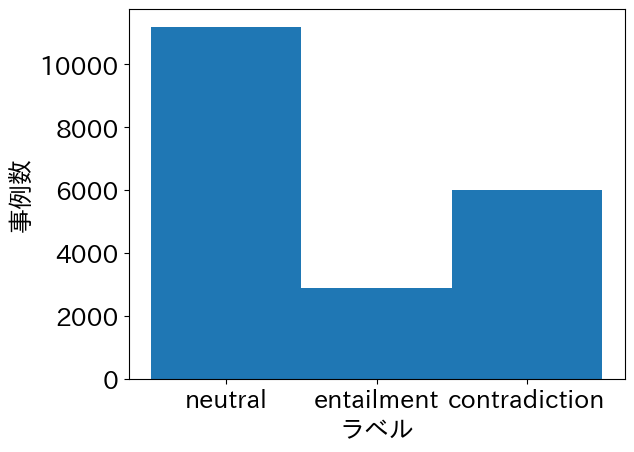

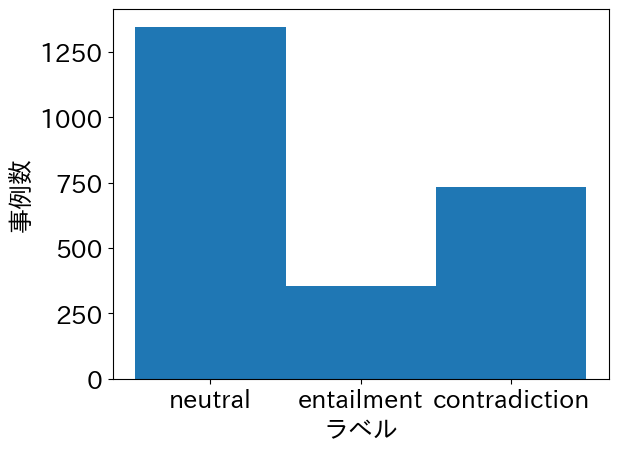

In [9]:
def visualize_labels(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„É©„Éô„É´ÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„É©„Éô„É´Êï∞„ÇíÊï∞„Åà„Çã
    label_counter = Counter()
    for data in dataset:
        label_id = data["label"]
        label_name = dataset.features["label"].names[label_id]
        label_counter[label_name] += 1
    # label_counter„ÇíÊ£í„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª„Åô„Çã
    plt.bar(label_counter.keys(), label_counter.values(), width=1.0)
    plt.xlabel("„É©„Éô„É´")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_labels(train_dataset)
visualize_labels(valid_dataset)

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÂâçÂá¶ÁêÜ

In [11]:
from transformers import BatchEncoding

def preprocess_text_pair_classification(
    example: dict[str, str | int]
) -> BatchEncoding:
    """Êñá„Éö„Ç¢Èñ¢‰øÇ‰∫àÊ∏¨„ÅÆ‰∫ãÈ†Ö„Çí„Éà„Éº„ÇØ„Éä„Ç§„Ç∫„Åó„ÄÅID„Å´Â§âÊèõ"""
    # Âá∫Âäõ„ÅØ"input_ids", "token_type_ids", "attention_mask"„Çíkey„Å®„Åó„ÄÅ
    # list[int]„Çívalue„Å®„Åô„ÇãBatchEncoding„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà
    encoded_example = tokenizer(
        example["sentence1"], example["sentence2"], max_length=128
    )
    
    # ‰ª•Èôç„Åß‰Ωø„ÅÜ„É¢„Éá„É´„ÅÆBertForSequenceClassification„ÅÆforward„É°„ÇΩ„ÉÉ„Éâ„Åå
    # list[int]„Çívalue„Å®„Åô„ÇãBatchEncoding„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà
    encoded_example["labels"] = example["label"]
    return encoded_example

In [12]:
# 2„Å§„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆ„Éà„Éº„ÇØ„É≥„ÅåÂá∫Âäõ„Åï„Çå„Çã„Åì„Å®Á¢∫Ë™ç
from transformers import AutoTokenizer

transformers_model_name = model_name
tokenizer = AutoTokenizer.from_pretrained(transformers_model_name)

example = train_dataset[0]
encoded_example = preprocess_text_pair_classification(example)
print(tokenizer.convert_ids_to_tokens(encoded_example["input_ids"]))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


['[CLS]', '‰∫å‰∫∫', '„ÅÆ', 'Áî∑ÊÄß', '„Åå', '„Ç∏„É£„É≥„Éú', '„Ç∏„Çß„ÉÉ„Éà', 'Ê©ü', '„Çí', 'Ë¶ã', '„Å¶', '„ÅÑ', '„Åæ„Åô', '„ÄÇ', '[SEP]', '2', '‰∫∫', '„ÅÆ', 'Áî∑ÊÄß', '„Åå', '„ÄÅ', 'ÁôΩ„ÅÑ', 'È£õË°å', 'Ê©ü', '„Çí', 'Áú∫„ÇÅ', '„Å¶', '„ÅÑ', '„Åæ„Åô', '„ÄÇ', '[SEP]']


In [13]:
### ÂâçÂá¶ÁêÜ
encoded_train_dataset = train_dataset.map(
    preprocess_text_pair_classification,
    remove_columns=train_dataset.column_names,
)
encoded_valid_dataset = valid_dataset.map(
    preprocess_text_pair_classification,
    remove_columns=valid_dataset.column_names,
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2434/2434 [00:00<00:00, 3199.21ex/s]


In [14]:
print(encoded_train_dataset[0])

{'input_ids': [2, 14269, 464, 13341, 430, 27914, 16753, 3107, 500, 5538, 456, 422, 12995, 385, 3, 33, 680, 464, 13341, 430, 384, 16517, 13208, 3107, 500, 29887, 456, 422, 12995, 385, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': 2}


#### „Éü„Éã„Éê„ÉÉ„ÉÅÊßãÁØâ

In [17]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [18]:
batch_inputs = data_collator(encoded_train_dataset[0:4])
pprint({name: tensor.size() for name, tensor in batch_inputs.items()})

{'attention_mask': torch.Size([4, 31]),
 'input_ids': torch.Size([4, 31]),
 'labels': torch.Size([4]),
 'token_type_ids': torch.Size([4, 31])}


#### „É¢„Éá„É´„ÅÆÊ∫ñÂÇô

In [19]:
from transformers import AutoModelForSequenceClassification

class_label = train_dataset.features["label"]
label2id = {label: id for id, label in enumerate(class_label.names)}
id2label = {id: label for id, label in enumerate(class_label.names)}
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=class_label.num_classes,
    label2id=label2id, # „É©„Éô„É´Âêç„Åã„ÇâID„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
    id2label=id2label, # ID„Åã„Çâ„É©„Éô„É´Âêç„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
)
print(type(model).__name__)

# „Éë„É©„É°„Éº„Çø„Çí„É°„É¢„É™‰∏ä„Å´Èö£Êé•„Åó„ÅüÂΩ¢„ÅßË®òÊÜ∂
# „Åì„Çå„ÇíÂÆüË°å„Åó„Å™„ÅÑÂ†¥Âêà„ÄÅ„É¢„Éá„É´„ÅÆ‰øùÂ≠ò„Åß„Ç®„É©„Éº„Å´„Å™„ÇãÂ†¥Âêà„Åå„ÅÇ„Çã
for param in model.parameters():
    param.data = param.data.contiguous()

Some weights of the model checkpoint at tohoku-nlp/bert-base-japanese-v3 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

BertForSequenceClassification


In [20]:
print(model.forward(**data_collator(encoded_train_dataset[0:4])))

SequenceClassifierOutput(loss=tensor(1.3709, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.5438, -0.6999, -0.6652],
        [ 0.5443, -0.6911, -0.6591],
        [ 0.5689, -0.7136, -0.6473],
        [ 0.5303, -0.7133, -0.6069]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


#### Ë®ìÁ∑¥„ÅÆÂÆüË°å

In [21]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="output_jnli",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    num_train_epochs=3,
    save_strategy="epoch",
    evaluation_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    report_to="none", # Â§ñÈÉ®„ÉÑ„Éº„É´„Å∏„ÅÆ„É≠„Ç∞„ÇíÁÑ°ÂäπÂåñ
)

In [22]:
import numpy as np

def compute_accuracy(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, int]:
    predictions, label = eval_pred
    # predictions„ÅØÂêÑ„É©„Éô„É´„Å´„Å§„ÅÑ„Å¶„ÅÆ„Çπ„Ç≥„Ç¢
    # ÊúÄ„ÇÇ„Çπ„Ç≥„Ç¢„ÅÆÈ´ò„ÅÑ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰∫àÊ∏¨„É©„Éô„É´„Å®„Åô„Çã
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions==label).mean()}

In [23]:
### Â≠¶Áøí
from transformers import Trainer

trainer = Trainer(
    model=model,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_valid_dataset,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_accuracy,
)
trainer.train()

Using cuda_amp half precision backend
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 20073
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1884


***** Running Evaluation *****
  Num examples = 2434
  Batch size = 32
Saving model checkpoint to output_jnli/checkpoint-628
Configuration saved in output_jnli/checkpoint-628/config.json
Model weights saved in output_jnli/checkpoint-628/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2434
  Batch size = 32
Saving model checkpoint to output_jnli/checkpoint-1256
Configuration saved in output_jnli/checkpoint-1256/config.json
Model weights saved in output_jnli/checkpoint-1256/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2434
  Batch size = 32
Saving model checkpoint to output_jnli/checkpoint-1884
Configuration saved in output_jnli/checkpoint-1884/config.json
Model weights saved in output_jnli/checkpoint-1884/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from output_jnli/checkpoint-1256 (score: 0.9013968775677896).


TrainOutput(global_step=1884, training_loss=0.2806084302833379, metrics={'train_runtime': 177.1105, 'train_samples_per_second': 340.008, 'train_steps_per_second': 10.637, 'total_flos': 1651171850205822.0, 'train_loss': 0.2806084302833379, 'epoch': 3.0})

#### Ë®ìÁ∑¥Âæå„ÅÆ„É¢„Éá„É´„ÅÆË©ï‰æ°

In [24]:
# Ê§úË®º„Çª„ÉÉ„Éà„Åß„É¢„Éá„É´Ë©ï‰æ°
eval_metrics = trainer.evaluate(encoded_valid_dataset)
pprint(eval_metrics)

***** Running Evaluation *****
  Num examples = 2434
  Batch size = 32


{'epoch': 3.0,
 'eval_accuracy': 0.9013968775677896,
 'eval_loss': 0.30560895800590515,
 'eval_runtime': 2.1831,
 'eval_samples_per_second': 1114.926,
 'eval_steps_per_second': 35.271}


### ÊÑèÂë≥ÁöÑÈ°û‰ººÂ∫¶Ë®àÁÆó

#### ÊÑèÂë≥ÁöÑÈ°û‰ººÂ∫¶Ë®àÁÆó

In [2]:
# ‰π±Êï∞„Ç∑„Éº„Éâ„ÅÆÂõ∫ÂÆö
from transformers.trainer_utils import set_seed

# ‰π±Êï∞„Ç∑„Éº„Éâ„Çí42„Å´Âõ∫ÂÆö
set_seed(42)

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô

In [4]:
from pprint import pprint
from datasets import load_dataset

# Hugging Face Hub‰∏ä„ÅÆllm-book/JGLUE„ÅÆ„É™„Éù„Ç∏„Éà„É™„Åã„Çâ
# JSTS„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„ÉàË™≠„ÅøËæº„ÇÄ
train_dataset = load_dataset(
    "llm-book/JGLUE", name="JSTS", split="train"
)
valid_dataset = load_dataset(
    "llm-book/JGLUE", name="JSTS", split="validation"
)

Extracting data files: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 1546.57it/s]


Dataset jglue downloaded and prepared to /root/.cache/huggingface/datasets/llm-book___jglue/JSTS/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f. Subsequent calls will reuse this data.


W1027 06:15:07.709398 139717496147968 builder.py:641] Reusing dataset jglue (/root/.cache/huggingface/datasets/llm-book___jglue/JSTS/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f)


In [5]:
# pprint„ÅßË¶ã„ÇÑ„Åô„ÅèË°®Á§∫
pprint(train_dataset[0])

{'label': 0.0,
 'sentence1': 'Â∑ù„Åπ„Çä„Åß„Çµ„Éº„Éï„Éú„Éº„Éâ„ÇíÊåÅ„Å£„Åü‰∫∫„Åü„Å°„Åå„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence2': '„Éà„Ç§„É¨„ÅÆÂ£Å„Å´Èªí„ÅÑ„Çø„Ç™„É´„Åå„Åã„Åë„Çâ„Çå„Å¶„ÅÑ„Åæ„Åô„ÄÇ',
 'sentence_pair_id': '0',
 'yjcaptions_id': '10005_480798-10996-92616'}


In [6]:
pprint(train_dataset.features)

{'label': Value(dtype='float32', id=None),
 'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'sentence_pair_id': Value(dtype='string', id=None),
 'yjcaptions_id': Value(dtype='string', id=None)}


#### „Éà„Éº„ÇØ„É≥„Éä„Ç§„Ç∂

In [7]:
from transformers import AutoTokenizer
# Hugging Face Hub‰∏ä„ÅÆ„É¢„Éá„É´Âêç„ÇíÊåáÂÆö
model_name = "tohoku-nlp/bert-base-japanese-v3"
# „É¢„Éá„É´Âêç„Åã„Çâ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÇíË™≠„ÅøËæº„ÇÄ
tokenizer = AutoTokenizer.from_pretrained(model_name)

https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpj7o28hxk
storing https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/8043b59e7a9639c56214adaed095b3cbf0d5092149be4d1f965b6acb30b8d3e1.4808e98b4c322931918efdb7a04a39d4791c7057a124ebb424f0c33b64ff0b04
creating metadata file for /root/.cache/huggingface/transformers/8043b59e7a9639c56214adaed095b3cbf0d5092149be4d1f965b6acb30b8d3e1.4808e98b4c322931918efdb7a04a39d4791c7057a124ebb424f0c33b64ff0b04
https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmp17ebxk86
storing https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/vocab.txt in cache at /root/.cache/huggingface/tr

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12451/12451 [00:03<00:00, 3933.20it/s]


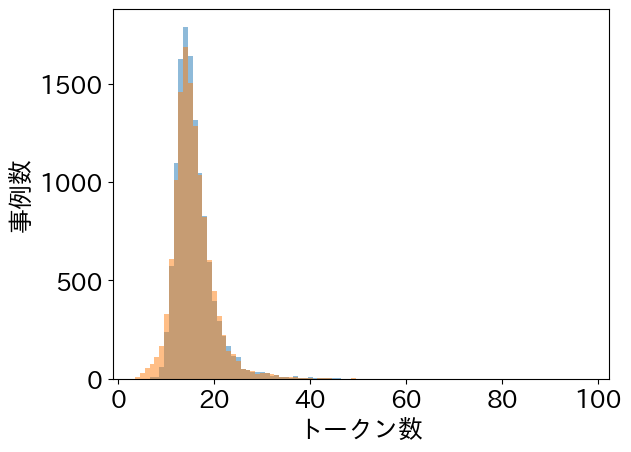

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1457/1457 [00:00<00:00, 4062.45it/s]


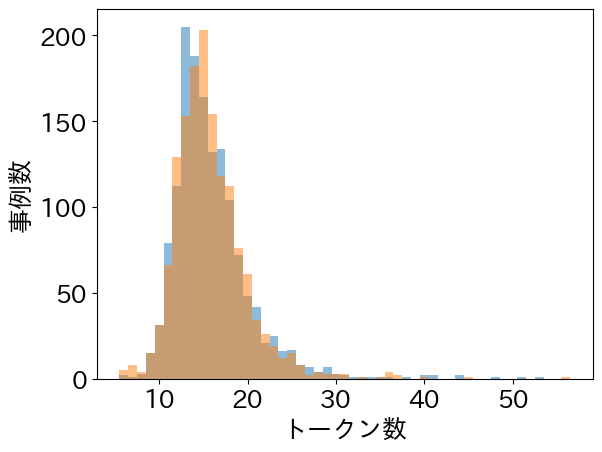

In [8]:
#### „Éá„Éº„Çø„Çª„ÉÉ„ÉàÁµ±Ë®à„ÅÆÂèØË¶ñÂåñ
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from datasets import Dataset
from tqdm import tqdm

plt.rcParams["font.size"] = 18

def visualize_text_length(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆ„Éà„Éº„ÇØ„É≥Êï∞„ÅÆÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆÈï∑„Åï„ÇíÊï∞„Åà„Çã
    length_counter1 = Counter()
    length_counter2 = Counter()
    for data in tqdm(dataset):
        length1 = len(tokenizer.tokenize(data["sentence1"]))
        length_counter1[length1] += 1
        length2 = len(tokenizer.tokenize(data["sentence2"]))
        length_counter2[length2] += 1
        
    # length_counter„ÅÆÂÄ§„Åã„ÇâÊ£í„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã
    plt.bar(length_counter1.keys(), length_counter1.values(), width=1.0, alpha=0.5)
    plt.bar(length_counter2.keys(), length_counter2.values(), width=1.0, alpha=0.5)
    plt.xlabel("„Éà„Éº„ÇØ„É≥Êï∞")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_text_length(train_dataset)
visualize_text_length(valid_dataset)

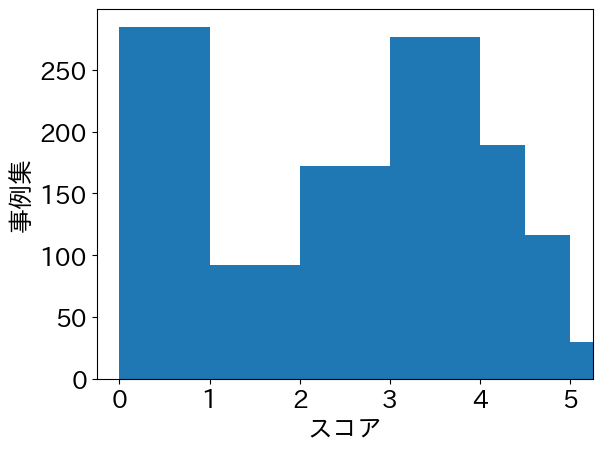

In [9]:
def visualize_scores(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„Çπ„Ç≥„Ç¢ÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„Çπ„Ç≥„Ç¢„ÇíÊäΩÂá∫
    scores = []
    for data in dataset:
        scores.append(data["label"])
        
    # label_counter„ÇíÊ£í„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª„Åô„Çã
    plt.hist(scores, width=1.0)
    plt.xlabel("„Çπ„Ç≥„Ç¢")
    plt.ylabel("‰∫ã‰æãÈõÜ")
    plt.show()
    
visualize_scores(valid_dataset)

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÂâçÂá¶ÁêÜ

In [10]:
from transformers import BatchEncoding

def preprocess_text_pair_classification(
    example: dict[str, str | int]
) -> BatchEncoding:
    """Êñá„Éö„Ç¢Èñ¢‰øÇ‰∫àÊ∏¨„ÅÆ‰∫ã‰æã„Çí„Éà„Éº„ÇØ„Éä„Ç§„Ç∫„Åó„ÄÅID„Å´Â§âÊèõ"""
    # Âá∫Âäõ„ÅØ"input_ids", "token_type_ids", "attention_mask"„Çíkey„Å®„Åó„ÄÅ
    # list[int]„Çívalue„Å®„Åô„ÇãBatchEncoding„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà
    encoded_example = tokenizer(
        example["sentence1"], example["sentence2"], max_length=128
    )
    
    # ‰ª•Èôç„Åß‰Ωø„ÅÜ„É¢„Éá„É´„ÅÆBertForSequenceClassification„ÅÆforward„É°„ÇΩ„ÉÉ„Éâ„Åå
    # Âèó„ÅëÂèñ„Çã„É©„Éô„É´„ÅÆÂºïÊï∞Âêç„Å´Âêà„Çè„Åõ„Å¶"labels"„Çí„Ç≠„Éº„Å´„Åô„Çã
    encoded_example["labels"] = example["label"]
    return encoded_example
    

In [12]:
### ÂâçÂá¶ÁêÜ„ÅÆÈÅ©Áî®
encoded_train_dataset = train_dataset.map(
    preprocess_text_pair_classification,
    remove_columns=train_dataset.column_names,
)
encoded_valid_dataset = valid_dataset.map(
    preprocess_text_pair_classification,
    remove_columns=valid_dataset.column_names,
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12451/12451 [00:04<00:00, 3040.52ex/s]
W1027 06:34:10.325295 139717496147968 arrow_dataset.py:2608] Loading cached processed dataset at /root/.cache/huggingface/datasets/llm-book___jglue/JSTS/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f/cache-8178bab62d7a102a.arrow


In [13]:
print(encoded_train_dataset[0])

{'input_ids': [2, 1943, 7740, 7234, 457, 12840, 7076, 15950, 500, 13008, 449, 680, 12626, 430, 422, 12995, 385, 3, 17884, 464, 1549, 461, 16568, 32500, 430, 12790, 12504, 456, 422, 12995, 385, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': 0.0}


#### „Éü„Éã„Éê„ÉÉ„ÉÅÊßãÁØâ

In [14]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [15]:
batch_inputs = data_collator(encoded_train_dataset[0:4])
pprint({name: tensor.size() for name, tensor in batch_inputs.items()})

{'attention_mask': torch.Size([4, 32]),
 'input_ids': torch.Size([4, 32]),
 'labels': torch.Size([4]),
 'token_type_ids': torch.Size([4, 32])}


#### „É¢„Éá„É´„ÅÆÊ∫ñÂÇô

In [16]:
from transformers import AutoModelForSequenceClassification

transformers_model_name = "tohoku-nlp/bert-base-japanese-v3"

model = AutoModelForSequenceClassification.from_pretrained(
    transformers_model_name,
    num_labels=1,
    problem_type="regression"
)

https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpch4znfom
storing https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/2c9ec44dde23b6b02ec9f34997dd1595677490da33cc6f7f5931a82fea500ef1.fa452780f4f534fd5a9a500fd6dc0ab2b41b7f3a87fde31e4e439dacbbe6eea3
creating metadata file for /root/.cache/huggingface/transformers/2c9ec44dde23b6b02ec9f34997dd1595677490da33cc6f7f5931a82fea500ef1.fa452780f4f534fd5a9a500fd6dc0ab2b41b7f3a87fde31e4e439dacbbe6eea3
loading configuration file https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/2c9ec44dde23b6b02ec9f34997dd1595677490da33cc6f7f5931a82fea500ef1.fa452780f4f534fd5a9a500fd6dc0ab2b41b7f3a87fde31e4e439dacbbe6eea3
Model config BertConfig {
  "_name_or_path": "toho

In [17]:
print(model.forward(**data_collator(encoded_train_dataset[0:4])))

SequenceClassifierOutput(loss=tensor(6.4943, grad_fn=<MseLossBackward0>), logits=tensor([[0.2608],
        [0.3047],
        [0.2998],
        [0.1691]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


#### Ë®ìÁ∑¥„ÅÆÂÆüË°å

In [18]:
### Ë®ìÁ∑¥ÊôÇ„ÅÆ„Éë„É©„É°„Éº„ÇøË®≠ÂÆö
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="../model/output_jsts",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="spearmanr",
    fp16=True,
    report_to="none",
)

PyTorch: setting up devices


In [25]:
### Ë©ï‰æ°Èñ¢Êï∞
import numpy as np
from scipy.stats import pearsonr, spearmanr

def compute_correlation_metrics(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, float]:
    """‰∫àÊ∏¨„Çπ„Ç≥„Ç¢„Å®Ê≠£Ëß£„Çπ„Ç≥„Ç¢„Åã„ÇâÂêÑÁ®ÆÁõ∏Èñ¢‰øÇÊï∞„ÇíË®àÁÆó"""
    predictions, labels = eval_pred
    predictions = predictions.squeeze(1)
    
    # pearsonr„Å®spearmanr„ÅØ (Áõ∏Èñ¢‰øÇÊï∞, pÂÄ§) „ÅÆ„Çø„Éó„É´„ÇíËøî„Åô
    pearson_corr, _ = pearsonr(predictions, labels)
    spearman_corr, _ = spearmanr(predictions, labels)
    
    return {
        "pearsonr": pearson_corr,
        "spearmanr": spearman_corr,
    }

In [26]:
### „É¢„Éá„É´Â≠¶Áøí
from transformers import Trainer

trainer = Trainer(
    model=model,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_valid_dataset,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_correlation_metrics
)

trainer.train()

Using cuda_amp half precision backend
***** Running training *****
  Num examples = 12451
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1170


***** Running Evaluation *****
  Num examples = 1457
  Batch size = 32
Saving model checkpoint to ../model/output_jsts/checkpoint-390
Configuration saved in ../model/output_jsts/checkpoint-390/config.json
Model weights saved in ../model/output_jsts/checkpoint-390/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1457
  Batch size = 32
Saving model checkpoint to ../model/output_jsts/checkpoint-780
Configuration saved in ../model/output_jsts/checkpoint-780/config.json
Model weights saved in ../model/output_jsts/checkpoint-780/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1457
  Batch size = 32
Saving model checkpoint to ../model/output_jsts/checkpoint-1170
Configuration saved in ../model/output_jsts/checkpoint-1170/config.json
Model weights saved in ../model/output_jsts/checkpoint-1170/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ../model/output_jsts/checkpoint-1170 (sco

TrainOutput(global_step=1170, training_loss=0.16661641373593583, metrics={'train_runtime': 116.6566, 'train_samples_per_second': 320.196, 'train_steps_per_second': 10.029, 'total_flos': 1012209974990184.0, 'train_loss': 0.16661641373593583, 'epoch': 3.0})

#### Ë®ìÁ∑¥Âæå„ÅÆ„É¢„Éá„É´„ÅÆË©ï‰æ°

In [27]:
# Ê§úË®º„Çª„ÉÉ„Éà„Åß„É¢„Éá„É´„ÇíË©ï‰æ°
eval_metrics = trainer.evaluate(encoded_valid_dataset)
pprint(eval_metrics)

***** Running Evaluation *****
  Num examples = 1457
  Batch size = 32


{'epoch': 3.0,
 'eval_loss': 0.3422102928161621,
 'eval_pearsonr': 0.9143472987266228,
 'eval_runtime': 1.2279,
 'eval_samples_per_second': 1186.557,
 'eval_spearmanr': 0.8748760708118822,
 'eval_steps_per_second': 37.462}


In [35]:
### „Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞„Åó„Åü„É¢„Éá„É´„ÅÆpipeline„ÇíË™≠„ÅøËæº„ÇÄ
from transformers import pipeline

text_sim_pipeline = pipeline(
    model="llm-book/bert-base-japanese-v3-jsts",
    function_to_apply="none"
)
# pipeline„ÇíÂÆüË°å
text1 = "Â∑ù„Åπ„Çä„Åß„Çµ„Éº„Éï„Éú„Éº„Éâ„ÇíÊåÅ„Å£„Åü‰∫∫„Åü„Å°„Åå„ÅÑ„Åæ„Åô"
text2 = "„Çµ„Éº„Éï„Ç°„Éº„Åü„Å°„ÅåÂ∑ù„Åπ„Çä„Å´Á´ã„Å£„Å¶„ÅÑ„Åæ„Åô"
print(text_sim_pipeline({"text": text1, "text_pair": text2})["score"])

loading configuration file https://huggingface.co/llm-book/bert-base-japanese-v3-jsts/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/7416e18f43074b8a4059dd2a18c5812eb25ea29ea24198f571aa9db78b219e7b.9e91c324b28864465f8b22c7b8bb2288549254690364c4e88d6eb9396b3ee6a6
Model config BertConfig {
  "_name_or_path": "llm-book/bert-base-japanese-v3-jsts",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "regression",
  "torch_dtype": "float32",
  "transformers_v

3.5703558921813965


### Â§öËÇ¢ÈÅ∏ÊäûÂºèË≥™ÂïèÂøúÁ≠î

In [1]:
from transformers.trainer_utils import set_seed

# ‰π±Êï∞„Ç∑„Éº„Éâ„Çí42„Å´Âõ∫ÂÆö
set_seed(42)

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô

In [2]:
from pprint import pprint
from datasets import load_dataset

# Hugging Face Hub‰∏ä„ÅÆllm-book/JGLUE„ÅÆ„É™„Éù„Ç∏„Éà„É™„Åã„Çâ
# JCommonsenseQA„ÅÆ„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÇÄ
train_dataset = load_dataset(
    "llm-book/JGLUE", name="JCommonsenseQA", split="train"
)
valid_dataset = load_dataset(
    "llm-book/JGLUE", name="JCommonsenseQA", split="validation"
)
# pprint„ÅßË¶ã„ÇÑ„Åô„ÅèË°®Á§∫„Åô„Çã
pprint(train_dataset[0])

Extracting data files: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 1973.33it/s]


Dataset jglue downloaded and prepared to /root/.cache/huggingface/datasets/llm-book___jglue/JCommonsenseQA/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f. Subsequent calls will reuse this data.


W1111 08:04:20.396098 140136710688768 builder.py:641] Reusing dataset jglue (/root/.cache/huggingface/datasets/llm-book___jglue/JCommonsenseQA/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f)


{'choice0': '‰∏ñÁïå',
 'choice1': 'ÂÜôÁúüÈõÜ',
 'choice2': 'ÁµµÊú¨',
 'choice3': 'Ë´ñÊñá',
 'choice4': 'Âõ≥Èëë',
 'label': 2,
 'q_id': 0,
 'question': '‰∏ª„Å´Â≠ê„Å©„ÇÇÂêë„Åë„ÅÆ„ÇÇ„ÅÆ„Åß„ÄÅ„Ç§„É©„Çπ„Éà„ÅÆ„Å§„ÅÑ„ÅüÁâ©Ë™û„ÅåÊõ∏„Åã„Çå„Å¶„ÅÑ„Çã„ÇÇ„ÅÆ„ÅØ„Å©„ÇåÔºü'}


In [3]:
pprint(train_dataset.features)

{'choice0': Value(dtype='string', id=None),
 'choice1': Value(dtype='string', id=None),
 'choice2': Value(dtype='string', id=None),
 'choice3': Value(dtype='string', id=None),
 'choice4': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=5,
                     names=['choice0',
                            'choice1',
                            'choice2',
                            'choice3',
                            'choice4'],
                     id=None),
 'q_id': Value(dtype='int64', id=None),
 'question': Value(dtype='string', id=None)}


### „Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Éº

In [5]:
from transformers import AutoTokenizer

# Hugging Face Hub‰∏ä„ÅÆ„É¢„Éá„É´Âêç„ÇíÊåáÂÆö
model_name = "tohoku-nlp/bert-base-japanese-v3"
# „É¢„Éá„É´Âêç„Åã„Çâ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Éº„ÇíË™≠„ÅøËæº„ÇÄ
tokenizer = AutoTokenizer.from_pretrained(model_name)

loading file https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/c9bc9ea10e626449e8b1e495b7732b9731759975f019624c92aa6360a07c72d7.e89607f19c59d268d8bab3289700c482c617a74844664e4996544f3e1a647db4
loading file https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/8043b59e7a9639c56214adaed095b3cbf0d5092149be4d1f965b6acb30b8d3e1.4808e98b4c322931918efdb7a04a39d4791c7057a124ebb424f0c33b64ff0b04


#### „Éá„Éº„Çø„Çª„ÉÉ„ÉàÁµ±Ë®à„ÅÆÂèØË¶ñÂåñ

In [6]:
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from datasets import Dataset
from tqdm import tqdm

plt.rcParams["font.size"] = 18

def visualize_question_length(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆË≥™Âïè„ÅÆ„Éà„Éº„ÇØ„É≥Êï∞„ÅÆÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆË≥™Âïè„ÅÆÈï∑„Åï„ÇíÊï∞„Åà„Çã
    length_counter = Counter()
    for data in tqdm(dataset):
        length = len(tokenizer.tokenize(data["question"]))
        length_counter[length] += 1
        
    # length_counter„ÅÆÂÄ§„Åã„ÇâÊ£í„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã
    plt.bar(length_counter.keys(), length_counter.values(), width=1.0)
    plt.xlabel("„Éà„Éº„ÇØ„É≥Êï∞")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8939/8939 [00:01<00:00, 4863.59it/s]


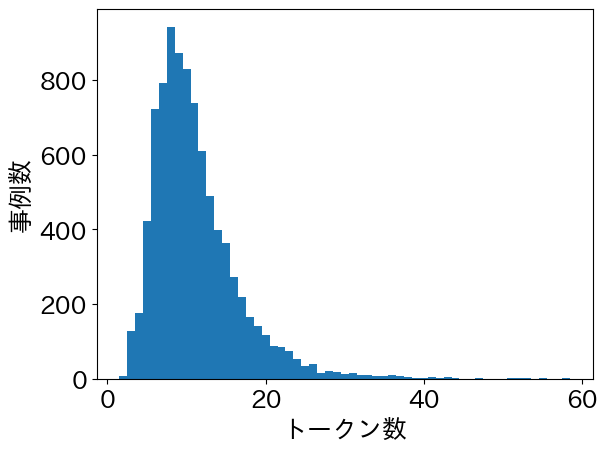

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1119/1119 [00:00<00:00, 5702.40it/s]


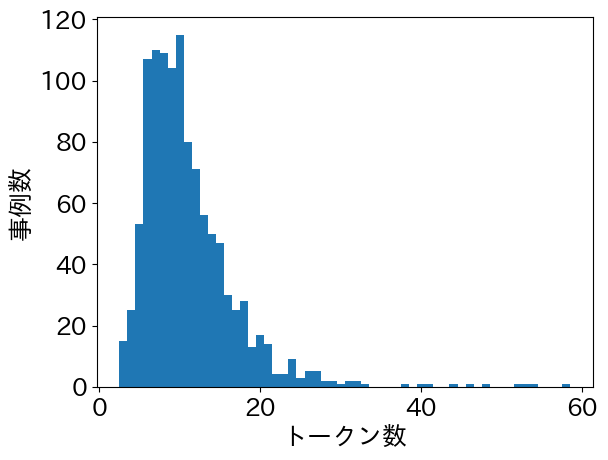

In [7]:
visualize_question_length(train_dataset)
visualize_question_length(valid_dataset)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8939/8939 [00:02<00:00, 3958.81it/s]


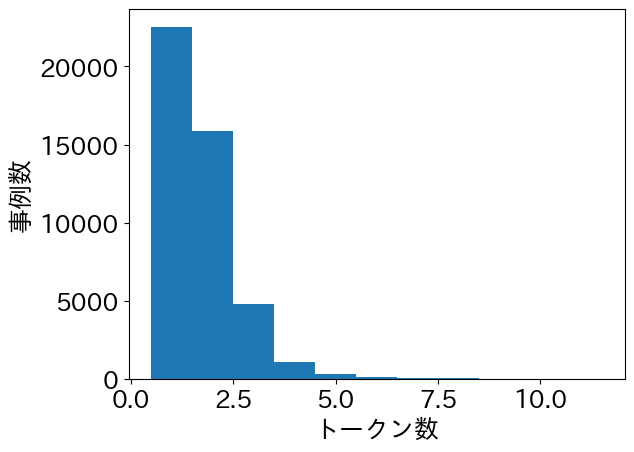

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1119/1119 [00:00<00:00, 3931.23it/s]


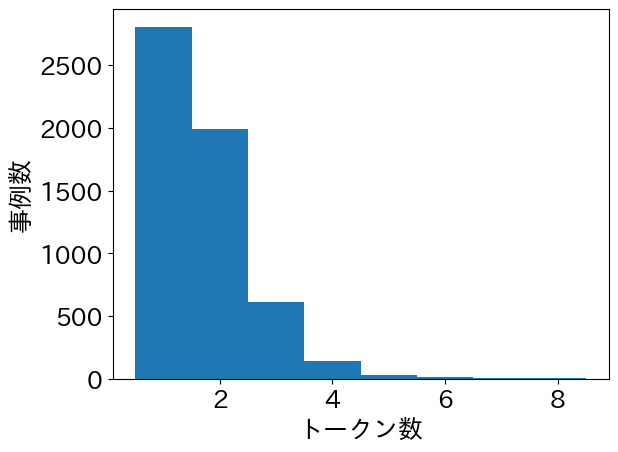

In [9]:
def visualize_choice_length(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆÈÅ∏ÊäûËÇ¢„ÅÆ„Éà„Éº„ÇØ„É≥Êï∞„ÅÆÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆÈÅ∏ÊäûËÇ¢„ÅÆÈï∑„Åï„ÇíÊï∞„Åà„Çã
    length_counter = Counter()
    for data in tqdm(dataset):
        for i in range(5):
            length = len(tokenizer.tokenize(data[f"choice{i}"]))
            length_counter[length] += 1
            
    # length_counter„ÅÆÂÄ§„Åã„ÇâÊ£í„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã
    plt.bar(length_counter.keys(), length_counter.values(), width=1.0)
    plt.xlabel("„Éà„Éº„ÇØ„É≥Êï∞")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_choice_length(train_dataset)
visualize_choice_length(valid_dataset)

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÂâçÂá¶ÁêÜ

In [14]:
from transformers import BatchEncoding

def preprocess_multiple_choice(
    example: dict[str, str]
) -> BatchEncoding:
    """Â§öËÇ¢ÈÅ∏ÊäûËÇ¢Ë≥™ÂïèÂøúÁ≠î„ÅÆ‰∫ã‰æã„ÇíID„Å´Â§âÊèõ"""
    # ÈÅ∏ÊäûËÇ¢„ÅÆÊï∞„Çí"choice"„Åã„ÇâÂßã„Åæ„Çã„Ç≠„Éº„ÅÆÊï∞„Å®„Åó„Å¶ÁÆóÂá∫
    num_choices = sum(
        key.startswith("choice") for key in example.keys()
    )
    
    # Ë≥™Âïè„Å®ÈÅ∏ÊäûËÇ¢„ÇíÈÄ£Áµê„Åó„Å¶„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„Éº„Å´Ê∏°„Åô
    choice_list = [example[f"choice{i}"] for i in range(num_choices)]
    repeated_question_list = [example["question"]] * num_choices
    encoded_example = tokenizer(
        repeated_question_list, choice_list, max_length=64
    )
    
    # „É©„Éô„É´„ÅåÂÖ•Âäõ„Å´Âê´„Åæ„Çå„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÄÅÂá∫Âäõ„Å´„ÇÇËøΩÂä†
    if "label" in example:
        encoded_example["labels"] = example["label"]
    return encoded_example

In [15]:
from transformers import AutoTokenizer

example = train_dataset[0]
encoded_example = preprocess_multiple_choice(example) # ‰∫ã‰æã„ÅÆÂâçÂá¶ÁêÜ
for choice in range(5):
    # ID„Åã„ÇâÂÖÉ„ÅÆÊñáÂ≠óÂàó„ÇíÂæ©ÂÖÉ
    print(tokenizer.decode(encoded_example["input_ids"][choice]))

[CLS] ‰∏ª„Å´ Â≠ê„Å©„ÇÇ Âêë„Åë „ÅÆ „ÇÇ„ÅÆ „Åß „ÄÅ „Ç§„É©„Çπ„Éà „ÅÆ „Å§„ÅÑ „Åü Áâ©Ë™û „Åå Êõ∏„Åã „Çå „Å¶ „ÅÑ„Çã „ÇÇ„ÅÆ „ÅØ „Å©„Çå? [SEP] ‰∏ñÁïå [SEP]
[CLS] ‰∏ª„Å´ Â≠ê„Å©„ÇÇ Âêë„Åë „ÅÆ „ÇÇ„ÅÆ „Åß „ÄÅ „Ç§„É©„Çπ„Éà „ÅÆ „Å§„ÅÑ „Åü Áâ©Ë™û „Åå Êõ∏„Åã „Çå „Å¶ „ÅÑ„Çã „ÇÇ„ÅÆ „ÅØ „Å©„Çå? [SEP] ÂÜôÁúü ÈõÜ [SEP]
[CLS] ‰∏ª„Å´ Â≠ê„Å©„ÇÇ Âêë„Åë „ÅÆ „ÇÇ„ÅÆ „Åß „ÄÅ „Ç§„É©„Çπ„Éà „ÅÆ „Å§„ÅÑ „Åü Áâ©Ë™û „Åå Êõ∏„Åã „Çå „Å¶ „ÅÑ„Çã „ÇÇ„ÅÆ „ÅØ „Å©„Çå? [SEP] ÁµµÊú¨ [SEP]
[CLS] ‰∏ª„Å´ Â≠ê„Å©„ÇÇ Âêë„Åë „ÅÆ „ÇÇ„ÅÆ „Åß „ÄÅ „Ç§„É©„Çπ„Éà „ÅÆ „Å§„ÅÑ „Åü Áâ©Ë™û „Åå Êõ∏„Åã „Çå „Å¶ „ÅÑ„Çã „ÇÇ„ÅÆ „ÅØ „Å©„Çå? [SEP] Ë´ñÊñá [SEP]
[CLS] ‰∏ª„Å´ Â≠ê„Å©„ÇÇ Âêë„Åë „ÅÆ „ÇÇ„ÅÆ „Åß „ÄÅ „Ç§„É©„Çπ„Éà „ÅÆ „Å§„ÅÑ „Åü Áâ©Ë™û „Åå Êõ∏„Åã „Çå „Å¶ „ÅÑ„Çã „ÇÇ„ÅÆ „ÅØ „Å©„Çå? [SEP] Âõ≥Èëë [SEP]


In [16]:
encoded_train_dataset = train_dataset.map(
    preprocess_multiple_choice,
    remove_columns=train_dataset.column_names,
)
encoded_valid_dataset = valid_dataset.map(
    preprocess_multiple_choice,
    remove_columns=valid_dataset.column_names,
)

 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 4128/8939 [00:03<00:03, 1237.45ex/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1119/1119 [00:00<00:00, 1323.37ex/s]


In [17]:
print(encoded_train_dataset[0])

{'input_ids': [[2, 13182, 16044, 12994, 464, 12518, 457, 384, 14930, 464, 12584, 449, 13360, 430, 14220, 494, 456, 12483, 12518, 465, 19382, 46, 3, 12575, 3], [2, 13182, 16044, 12994, 464, 12518, 457, 384, 14930, 464, 12584, 449, 13360, 430, 14220, 494, 456, 12483, 12518, 465, 19382, 46, 3, 13409, 6460, 3], [2, 13182, 16044, 12994, 464, 12518, 457, 384, 14930, 464, 12584, 449, 13360, 430, 14220, 494, 456, 12483, 12518, 465, 19382, 46, 3, 20647, 3], [2, 13182, 16044, 12994, 464, 12518, 457, 384, 14930, 464, 12584, 449, 13360, 430, 14220, 494, 456, 12483, 12518, 465, 19382, 46, 3, 15252, 3], [2, 13182, 16044, 12994, 464, 12518, 457, 384, 14930, 464, 12584, 449, 13360, 430, 14220, 494, 456, 12483, 12518, 465, 19382, 46, 3, 22929, 3]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0

### „Éü„Éã„Éê„ÉÉ„ÉÅÊßãÁØâ

In [19]:
import torch
from transformers import BatchEncoding

def collate_fn_multiple_choice(
    features: list[BatchEncoding],
) -> dict[str, torch.Tensor]:
    """ÈÅ∏ÊäûËÇ¢ÂºèË≥™ÂïèÂøúÁ≠î„ÅÆÂÖ•Âäõ„Åã„Çâ„Éü„Éã„Éê„ÉÉ„ÉÅ„ÇíÊßãÁØâ"""
    # preprocess_multiple_choiceÈñ¢Êï∞„Å´Âêà„Çè„Åõ„Å¶„É©„Éô„É´Âêç„Çí"labels"„Å´„Åô„Çã
    label_name = "labels"
    
    batch_size = len(features)
    num_choices = len(features[0]["input_ids"])
    
    # ÈÅ∏ÊäûËÇ¢„Åî„Å®„ÅÆÂÖ•Âäõ„Çí‰∏Ä„Å§„ÅÆlist„Å´„Åæ„Å®„ÇÅ„Çã
    flat_features = []
    for feature in features:
        flat_features += [
            {k: v[i] for k, v in feature.items() if k != label_name}
            for i in range(num_choices)
        ]
        
    # ÈÅ∏ÊäûËÇ¢„Åî„Å®„ÅÆÂÖ•Âäõ„Å´„Å§„ÅÑ„Å¶„ÇÇ„Éë„Éá„Ç£„É≥„Ç∞„ÇíË°å„ÅÜ
    flat_batch = tokenizer.pad(flat_features, return_tensors="pt")
    
    # ÂÖÉ„ÅÆ„Éê„ÉÉ„ÉÅ„Åî„Å®„Å´ÈÅ∏ÊäûËÇ¢„Åî„Å®„ÅÆÂÖ•Âäõ„Çí„Åæ„Å®„ÇÅ„Çã
    # („Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫ * ÈÅ∏ÊäûËÇ¢Êï∞, ÊúÄÂ§ßÁ≥ªÂàóÈï∑)„ÅÆÂΩ¢„Çí„Åó„ÅüTensor„Çí„ÄÅ
    # („Éê„ÉÉ„ÉÅ„Çµ„Ç§„Ç∫, ÈÅ∏ÊäûËÇ¢Êï∞, ÊúÄÂ§ßÁ≥ªÂàóÈï∑)„Å´Â§âÊèõ
    batch = {
        k: v.view(batch_size, num_choices, -1)
        for k, v in flat_batch.items()
    }
    
    # „É©„Éô„É´„ÅåÂÖ•Âäõ„Å´Âê´„Åæ„Çå„Å¶„ÅÑ„ÇãÂ†¥Âêà„ÄÅ„Éê„ÉÉ„ÉÅ„Å´„Åæ„Å®„ÇÅ„Å¶Tensor„Å´Â§âÊèõ
    if label_name in features[0]:
        labels = [feature[label_name] for feature in features]
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
    return batch

In [20]:
batch_size = 4
encoded_examples = [
    preprocess_multiple_choice(train_dataset[i])
    for i in range(batch_size)
]

batch = collate_fn_multiple_choice(encoded_examples)
pprint({name: tensor.size() for name, tensor in batch.items()})

{'attention_mask': torch.Size([4, 5, 40]),
 'input_ids': torch.Size([4, 5, 40]),
 'labels': torch.Size([4]),
 'token_type_ids': torch.Size([4, 5, 40])}


#### „É¢„Éá„É´„ÅÆÊ∫ñÂÇô

In [22]:
from transformers import AutoModelForMultipleChoice

model = AutoModelForMultipleChoice.from_pretrained(
    model_name,
    num_labels=train_dataset.features["label"].num_classes,
)

# „Éë„É©„É°„Éº„Çø„Çí„É°„É¢„É™‰∏ä„Å´Èö£Êé•„Åó„ÅüÂΩ¢„ÅßÈÖçÁΩÆ
for param in model.parameters():
    param.data = param.data.contiguous()

loading configuration file https://huggingface.co/tohoku-nlp/bert-base-japanese-v3/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/2c9ec44dde23b6b02ec9f34997dd1595677490da33cc6f7f5931a82fea500ef1.fa452780f4f534fd5a9a500fd6dc0ab2b41b7f3a87fde31e4e439dacbbe6eea3
Model config BertConfig {
  "_name_or_path": "tohoku-nlp/bert-base-japanese-v3",
  "architectures": [
    "BertForPreTraining"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "p

In [23]:
model(**batch)

MultipleChoiceModelOutput(loss=tensor(1.4848, grad_fn=<NllLossBackward0>), logits=tensor([[-0.3795, -0.3648, -0.1021, -0.4802, -0.2815],
        [-0.0629,  0.0435, -0.4554, -0.1143, -0.2337],
        [-0.5503, -0.5156, -0.6268, -0.5746, -0.5088],
        [-0.4857, -0.4155, -0.5902, -0.2060, -0.2705]],
       grad_fn=<ViewBackward0>), hidden_states=None, attentions=None)

#### Ë®ìÁ∑¥„ÅÆÂÆüË°å

In [27]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="../model/output_jcommonsenseqa",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    report_to="none",
)

PyTorch: setting up devices


In [28]:
import numpy as np
def compute_accuracy(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, float]:
    """‰∫àÊ∏¨„É©„Éô„É´„Å®Ê≠£Ëß£„É©„Éô„É´„Åã„ÇâÊ≠£Ëß£Áéá„ÇíË®àÁÆó"""
    predictions, labels = eval_pred
    # predictions„ÅØÂêÑ„É©„Éô„É´„Å´„Å§„ÅÑ„Å¶„ÅÆ„Çπ„Ç≥„Ç¢
    # ÊúÄ„ÇÇ„Çπ„Ç≥„Ç¢„ÅÆÈ´ò„ÅÑ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰∫àÊ∏¨„É©„Éô„É´„Å®„Åô„Çã
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions==labels).mean()}

In [29]:
from transformers import Trainer

trainer = Trainer(
    model=model,
     train_dataset=encoded_train_dataset,
     eval_dataset=encoded_valid_dataset,
     data_collator=collate_fn_multiple_choice,
     args=training_args,
     compute_metrics=compute_accuracy,
)
trainer.train()

Using cuda_amp half precision backend
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 8939
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 840


***** Running Evaluation *****
  Num examples = 1119
  Batch size = 32
Saving model checkpoint to ../model/output_jcommonsenseqa/checkpoint-280
Configuration saved in ../model/output_jcommonsenseqa/checkpoint-280/config.json
Model weights saved in ../model/output_jcommonsenseqa/checkpoint-280/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1119
  Batch size = 32
Saving model checkpoint to ../model/output_jcommonsenseqa/checkpoint-560
Configuration saved in ../model/output_jcommonsenseqa/checkpoint-560/config.json
Model weights saved in ../model/output_jcommonsenseqa/checkpoint-560/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 1119
  Batch size = 32
Saving model checkpoint to ../model/output_jcommonsenseqa/checkpoint-840
Configuration saved in ../model/output_jcommonsenseqa/checkpoint-840/config.json
Model weights saved in ../model/output_jcommonsenseqa/checkpoint-840/pytorch_model.bin


Training completed. Do not forget to share your model on huggi

TrainOutput(global_step=840, training_loss=0.2555528822399321, metrics={'train_runtime': 134.3812, 'train_samples_per_second': 199.559, 'train_steps_per_second': 6.251, 'total_flos': 2305556727283980.0, 'train_loss': 0.2555528822399321, 'epoch': 3.0})

In [30]:
#### Ë®ìÁ∑¥Âæå„ÅÆ„É¢„Éá„É´Ë©ï‰æ°
eval_metrics = trainer.evaluate(encoded_valid_dataset)
pprint(eval_metrics)

***** Running Evaluation *****
  Num examples = 1119
  Batch size = 32


{'epoch': 3.0,
 'eval_accuracy': 0.8355674709562109,
 'eval_loss': 0.593048095703125,
 'eval_runtime': 1.6528,
 'eval_samples_per_second': 677.041,
 'eval_steps_per_second': 21.176}


#### Â≠¶ÁøíÊ∏à„Åø„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÅÆÂèñÂæó

In [31]:
from transformers import AutoModelForMultipleChoice, AutoTokenizer

model_name = "llm-book/bert-base-japanese-v3-jcommonsenseqa"
tokeniser = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMultipleChoice.from_pretrained(model_name)

https://huggingface.co/llm-book/bert-base-japanese-v3-jcommonsenseqa/resolve/main/tokenizer_config.json not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpkn93ft68
storing https://huggingface.co/llm-book/bert-base-japanese-v3-jcommonsenseqa/resolve/main/tokenizer_config.json in cache at /root/.cache/huggingface/transformers/d5c4c9cae5c426bb714d883fb0f3f4896da9673fa81d8bd02dcb52b0c5dfc2d8.a5f7ab9af9f6a84e4c5714eff652410283ececd3ce47ca1228ea7ee36b2089a2
creating metadata file for /root/.cache/huggingface/transformers/d5c4c9cae5c426bb714d883fb0f3f4896da9673fa81d8bd02dcb52b0c5dfc2d8.a5f7ab9af9f6a84e4c5714eff652410283ececd3ce47ca1228ea7ee36b2089a2
https://huggingface.co/llm-book/bert-base-japanese-v3-jcommonsenseqa/resolve/main/vocab.txt not found in cache or force_download set to True, downloading to /root/.cache/huggingface/transformers/tmpvfxam4eg
storing https://huggingface.co/llm-book/bert-base-japanese-v3-jcommonsenseqa/resolve/ma

In [32]:
# ÊñáÁ´†ÂàÜÈ°û„Åß„Åç„Çãpipeline„ÅÆÂÆöÁæ©

def pipeline_multiple_choice(
    examples: dict[str, str] | list[dict[str, str]]
) -> list[dict[str, str]]:
    """Â§öËÇ¢ÈÅ∏ÊäûÂºèË≥™ÂïèÂøúÁ≠î„ÅÆ‰∫ã‰æã„Å´„Å§„ÅÑ„Å¶‰∫àÊ∏¨"""
    # Âçò‰∏Ä„ÅÆdictÂÖ•Âäõ„Åå‰∏é„Åà„Çâ„Çå„Åü„Å®„Åç„Å´„ÄÅlist„Å´Ê†ºÁ¥ç„Åô„Çã
    if isinstance(examples, dict):
        examples = [examples]
        
    # ‰∫ã‰æã„Çí„É¢„Éá„É´„ÅÆÂÖ•ÂäõÂΩ¢Âºè„Å´Â§âÊèõ
    encoded_examples = [
        preprocess_multiple_choice(e) for e in examples
    ]
    batch = collate_fn_multiple_choice(encoded_examples)
    
    # „É¢„Éá„É´„Åå‰ΩøÁî®„Åô„Çã„Éá„Éê„Ç§„Çπ‰∏äÔºàCPU/GPUÔºâ„Å´„Éá„Éº„Çø„ÇíÁßªÂãï
    batch = {k: v.to(model.device) for k, v in batch.items()}
    
    # „É¢„Éá„É´„ÅÆforwardË®àÁÆóÂá¶ÁêÜ
    model_output = model.forward(**batch)
    
    # „É¢„Éá„É´„ÅÆÂá∫Âäõ„Åã„Çâ„ÄÅÈÅ∏ÊäûËÇ¢„ÅÆÊñáÂ≠óÂàó„Å®‰∫àÊ∏¨Á¢∫Áéá„ÇíÂæó„Çã
    predicted_ids = model_output.logits.argmax(dim=-1).tolist()
    probs = torch.softmax(model_output.logits, dim=-1)
    predictes_probs = [ps[i].item() for ps, i in zip(probs, predicted_ids)]
    predictions = [
        {"prediction": e[f"choice{i}"], "pred_prob": p}
        for e, i, p in zip(examples, predicted_ids, predictes_probs)
    ]
    
    return predictions

In [33]:
from datasets import load_dataset

valid_dataset = load_dataset(
    "llm-book/JGLUE", name="JCommonsenseQA", split="validation"
)

W1111 09:10:36.031617 140136710688768 builder.py:641] Reusing dataset jglue (/root/.cache/huggingface/datasets/llm-book___jglue/JCommonsenseQA/1.1.0/b394a8dbefe82fb1dc2724c1eb79bb1ea3062df2037f91a69a27c089f3ff685f)


In [34]:
model = model.to("cuda:0")

In [36]:
from tqdm import tqdm

# „É©„Éô„É´Âêç„ÅÆÊÉÖÂ†±„ÇíÂèñÂæó„Åô„Çã„Åü„ÇÅ„ÅÆClassLabel„Ç§„É≥„Çπ„Çø„É≥„Çπ
class_label = valid_dataset.features["label"]

results: list[dict[str, float]] = []
for i, example in tqdm(enumerate(valid_dataset)):
    # „É¢„Éá„É´„ÅÆ‰∫àÊ∏¨ÁµêÊûú„ÇíÊ†ºÁ¥ç
    model_prediction = pipeline_multiple_choice(example)[0]
    # Ê≠£Ëß£„ÅÆÊñáÂ≠óÂàó„ÇíÂèñÂæó
    true_label = example["label"]
    correct_answer = example[f"choice{true_label}"]
    # results„Å´ÂàÜÊûê„Å´ÂøÖË¶Å„Å™ÊÉÖÂ†±„ÇíÊ†ºÁ¥ç
    results.append(
        {
            "example_id": i,
            "pred_prob": model_prediction["pred_prob"],
            "prediction": model_prediction["prediction"],
            "correct_answer": correct_answer,
        }
    )

472it [00:06, 73.16it/s]Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
1119it [00:15, 72.78it/s]


#### „Ç®„É©„ÉºÂàÜÊûê

In [37]:
# ‰∫àÊ∏¨„ÅåË™§„Å£„Åü‰∫ã‰æã„ÇíÂèéÈõÜ
failed_results = [
    res for res in results if res["prediction"] != res["correct_answer"]
]
# „É¢„Éá„É´„ÅÆ‰∫àÊ∏¨Á¢∫Áéá„ÅåÈ´ò„ÅÑÈ†Ü„Å´„ÇΩ„Éº„Éà
sorted_failed_results = sorted(
    failed_results, key=lambda x: -x["pred_prob"]
)
# È´ò„ÅÑÁ¢∫Áéá„Åß‰∫àÊ∏¨„Åó„Å™„Åå„ÇâË™§„Å£„Åü‰∫ã‰æã„ÅÆ‰∏ä‰Ωç„ÇíË°®Á§∫
for top_result in sorted_failed_results[:10]:
    question = valid_dataset[top_result["example_id"]]["question"]
    
    print(f"ÂïèÈ°å: {question}")
    
    print(f"‰∫àÊ∏¨: {top_result['prediction']}")
    print(f"Ê≠£Ëß£: {top_result['correct_answer']}")
    print(f"‰∫àÊ∏¨Á¢∫Áéá: {top_result['pred_prob']:.4f}")
    print("---------------")

ÂïèÈ°å: ‰Ωï„Åã„Å´ÈÄö„Çã„Åü„ÇÅ„Å´„ÉÅ„É£„É¨„É≥„Ç∏„Åô„Çã‰∫ã„Å®„ÅØÔºü
‰∫àÊ∏¨: ÂêàÊ†º„Åô„Çã
Ê≠£Ëß£: ÂèóÈ®ì
‰∫àÊ∏¨Á¢∫Áéá: 0.9998
---------------
ÂïèÈ°å: Êúù„Å´È£≤„ÇÄÊ±ÅÁâ©„Çí‰Ωï„Å®Âëº„Å∂Ôºü
‰∫àÊ∏¨: „Åä„Åã„ÇÜ
Ê≠£Ëß£: „Çπ„Éº„Éó
‰∫àÊ∏¨Á¢∫Áéá: 0.9997
---------------
ÂïèÈ°å: Â§úÁ©∫„Å´Ë¶ã„Åà„Çã‰∏ÄÁï™Â§ß„Åç„ÅÑ„ÇÇ„ÅÆ„ÅØÔºü
‰∫àÊ∏¨: Êòü
Ê≠£Ëß£: „ÅäÊúàÊßò
‰∫àÊ∏¨Á¢∫Áéá: 0.9989
---------------
ÂïèÈ°å: ËäùÂ±Ö„ÇíË°å„ÅÜÂª∫Áâ©„Çí‰Ωï„Å®„ÅÑ„ÅÜÔºü
‰∫àÊ∏¨: „Çπ„Çø„Ç∏„Ç™
Ê≠£Ëß£: ÊºîËä∏Â†¥
‰∫àÊ∏¨Á¢∫Áéá: 0.9984
---------------
ÂïèÈ°å: Â†¥ÊâÄÂèñ„Çä„Åô„ÇãÂÆ¥‰ºö„Å®„ÅØÔºü
‰∫àÊ∏¨: „Éë„Éº„ÉÜ„Ç£
Ê≠£Ëß£: Ëä±Ë¶ã
‰∫àÊ∏¨Á¢∫Áéá: 0.9971
---------------
ÂïèÈ°å: ËàπËà∂„ÇíÂÆâÂÆö„Åï„Åõ„ÇãÁâ©„Å®Âêå„ÅòÁô∫Èü≥„Å™„ÅÆ„ÅØ„ÄÅ„Å©„Çå„Åß„Åó„Çá„ÅÜÔºü
‰∫àÊ∏¨: Á¢á
Ê≠£Ëß£: ÊÄí„Çä
‰∫àÊ∏¨Á¢∫Áéá: 0.9967
---------------
ÂïèÈ°å: „Åù„ÇÇ„Åù„ÇÇ„ÉªÂàù„ÇÅ„Åã„Çâ„Å™„Å©„ÇíË®Ä„ÅÑÊèõ„Åà„Çã„Å®Ôºü
‰∫àÊ∏¨: ÁµÇ„Å´
Ê≠£Ëß£: ÂÖÉ„ÅØ
‰∫àÊ∏¨Á¢∫Áéá: 0.9966
---------------
ÂïèÈ°å: Êõ∏„ÅçÁâ©„Çí„Åó„Åü„ÇäÊú¨„ÇíË™≠„Çì„Å†„Çä„Åô„Çã„Åü„ÇÅ„ÅÆÂ†¥ÊâÄ„ÅØ„Å©„ÅìÔºü
‰∫àÊ∏¨: Êõ∏Êû∂
Ê≠£Ëß£

### Â§ßË¶èÊ®°Ë®ÄË™û„É¢„Éá„É´„ÅÆ„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞

#### „É°„É¢„É™ÂäπÁéá„ÅÆËâØ„ÅÑ„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞

#### LoRA„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [ ]:
# !pip install peft

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 320.7/320.7 kB 6.5 MB/s eta 0:00:00a 0:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 435.0/435.0 kB 12.0 MB/s eta 0:00:00a 0:00:01
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 333.2/333.2 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.12.0
    Uninstalling accelerate-0.12.0:
      Successfully uninstalled accelerate-0.12.0
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3

In [1]:
# ‰π±Êï∞„Ç∑„Éº„Éâ„ÅÆÂõ∫ÂÆö
from transformers.trainer_utils import set_seed
set_seed(42)

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô
from pprint import pprint
from datasets import load_dataset

# Hugging Face Hub‰∏ä„ÅÆ„É™„Éù„Ç∏„Éà„É™„Åã„Çâ„Éá„Éº„ÇøË™≠„ÅøËæº„Åø
# „Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÇÄ
train_dataset = load_dataset("llm-book/wrime-sentiment", split="train")
valid_dataset = load_dataset("llm-book/wrime-sentiment", split="validation")
pprint(train_dataset[0])

Using custom data configuration default
Reusing dataset wrime-sentiment (/root/.cache/huggingface/datasets/llm-book___wrime-sentiment/default/0.0.0/c49a65171c421f2ae4dd3db82595f499cf0d289ca6780a2aeddf710f22dd8a37)
Using custom data configuration default
Reusing dataset wrime-sentiment (/root/.cache/huggingface/datasets/llm-book___wrime-sentiment/default/0.0.0/c49a65171c421f2ae4dd3db82595f499cf0d289ca6780a2aeddf710f22dd8a37)


{'datetime': '2012/7/31 23:48',
 'label': 1,
 'sentence': '„Åº„Åë„Å£„Å®„Åó„Å¶„Åü„Çâ„Åì„Çì„Å™ÊôÇÈñì„ÄÇ„ÉÅ„É£„É™„ÅÇ„Çã„Åã„ÇâÈ£ü„Åπ„Å´„Åß„Åü„ÅÑ„ÅÆ„Å´‚Ä¶',
 'user_id': 1}


In [3]:
pprint(train_dataset.features)

{'datetime': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=2, names=['positive', 'negative'], id=None),
 'sentence': Value(dtype='string', id=None),
 'user_id': Value(dtype='int64', id=None)}


#### „Éà„Éº„ÇØ„Éä„Ç§„Ç∂

In [4]:
from transformers import AutoTokenizer

# Hugging Face Hub‰∏ä„ÅÆ„É¢„Éá„É´Âêç„ÇíÊåáÂÆö
model_name = "tohoku-nlp/bert-base-japanese-v3"
# „É¢„Éá„É´Âêç„Åã„Çâ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÇíË™≠„ÅøËæº„ÇÄ
tokenizer = AutoTokenizer.from_pretrained(model_name)
# „Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÅÆ„ÇØ„É©„ÇπÂêç„ÇíÁ¢∫Ë™ç
print(type(tokenizer).__name__)

BertJapaneseTokenizer


In [5]:
tokenizer.tokenize("„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô„ÄÇ")

['„Åì„Çå', '„ÅØ', '„ÉÜ„Çπ„Éà', '„Åß„Åô', '„ÄÇ']

In [6]:
encoded_input = tokenizer("„Åì„Çå„ÅØ„ÉÜ„Çπ„Éà„Åß„Åô„ÄÇ")
# Âá∫Âäõ„Åï„Çå„Åü„Ç™„Éñ„Ç∏„Çß„ÇØ„Éà„ÅÆ„ÇØ„É©„Çπ„ÇíË°®Á§∫
print(type(encoded_input).__name__)

BatchEncoding


In [7]:
pprint(encoded_input)

{'attention_mask': [1, 1, 1, 1, 1, 1, 1],
 'input_ids': [2, 12538, 465, 14985, 13037, 385, 3],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0]}


In [8]:
tokenizer.convert_ids_to_tokens(encoded_input["input_ids"])

['[CLS]', '„Åì„Çå', '„ÅØ', '„ÉÜ„Çπ„Éà', '„Åß„Åô', '„ÄÇ', '[SEP]']

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÁµ±Ë®àÂèØË¶ñÂåñ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20149/20149 [00:04<00:00, 4968.70it/s]


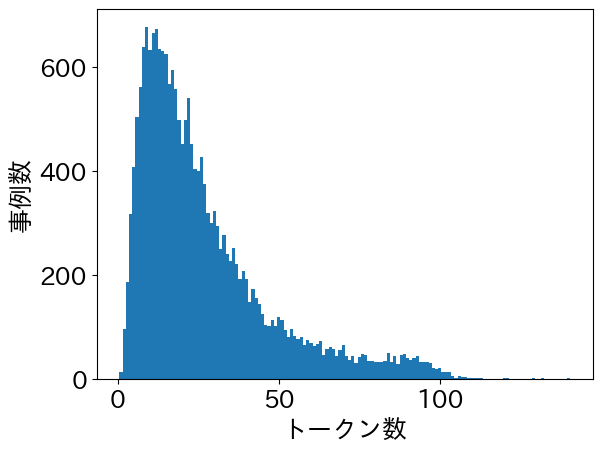

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1608/1608 [00:00<00:00, 4160.41it/s]


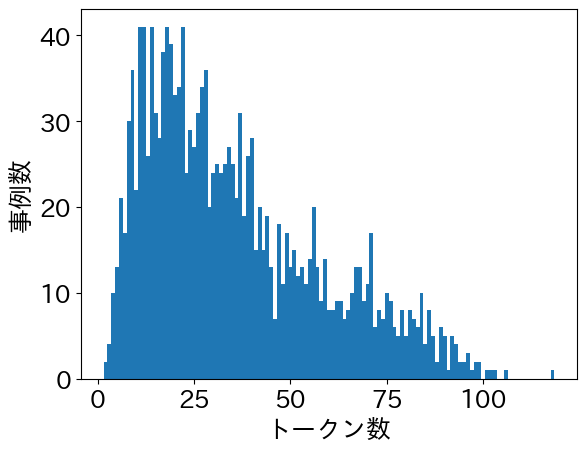

In [9]:
from collections import Counter
import japanize_matplotlib
import matplotlib.pyplot as plt
from datasets import Dataset
from tqdm import tqdm

plt.rcParams["font.size"] = 18

def visualize_text_length(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆ„Éà„Éº„ÇØ„É≥Êï∞„ÅÆÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„ÅÆÈï∑„Åï„ÇíÊï∞„Åà„Çã
    length_counter = Counter()
    for data in tqdm(dataset):
        length = len(tokenizer.tokenize(data["sentence"]))
        length_counter[length] += 1
    # length_counter„ÅÆÂÄ§„Åã„ÇâÊ£í„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã
    plt.bar(length_counter.keys(), length_counter.values(), width=1.0)
    plt.xlabel("„Éà„Éº„ÇØ„É≥Êï∞")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_text_length(train_dataset)
visualize_text_length(valid_dataset)

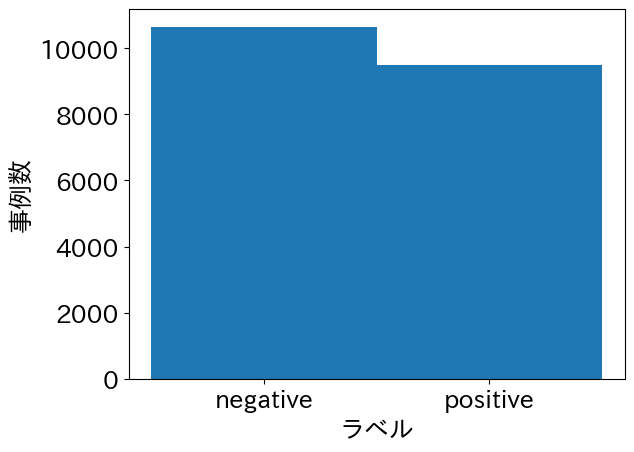

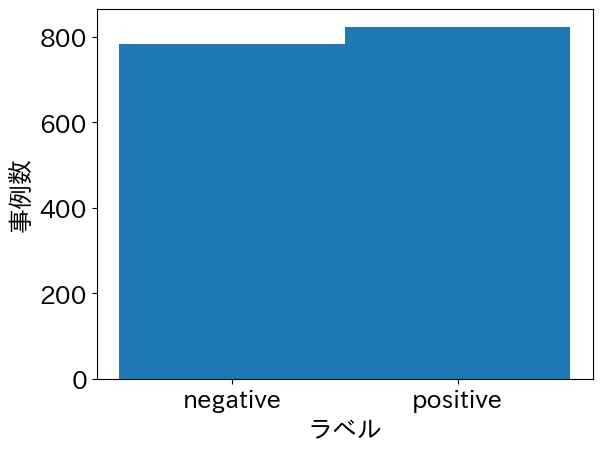

In [10]:
def visualize_labels(dataset: Dataset):
    """„Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„ÅÆ„É©„Éô„É´ÂàÜÂ∏É„Çí„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª"""
    # „Éá„Éº„Çø„Çª„ÉÉ„Éà‰∏≠„Å´„É©„Éô„É´„ÅÆÊï∞„ÇíÊï∞„Åà„Çã
    label_counter = Counter()
    for data in dataset:
        label_id = data["label"]
        label_name = dataset.features["label"].names[label_id]
        label_counter[label_name] += 1
    # label_counter„ÇíÊ£í„Ç∞„É©„Éï„Å®„Åó„Å¶ÊèèÁîª„Åô„Çã
    plt.bar(label_counter.keys(), label_counter.values(), width=1.0)
    plt.xlabel("„É©„Éô„É´")
    plt.ylabel("‰∫ã‰æãÊï∞")
    plt.show()
    
visualize_labels(train_dataset)
visualize_labels(valid_dataset)

#### „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÂâçÂá¶ÁêÜ

In [11]:
from transformers import BatchEncoding

def preprocess_text_classification(
    example: dict[str, str | int]
) -> BatchEncoding:
    """ÊñáÁ´†ÂàÜÈ°û„ÅÆ‰∫ã‰æã„ÅÆ„ÉÜ„Ç≠„Çπ„Éà„Çí„Éà„Éº„ÇØ„Éä„Ç§„Ç∫„Åó„ÄÅIDÂ§âÊèõ"""
    encoded_example = tokenizer(example["sentence"], max_length=512)
    # „É¢„Éá„É´„ÅÆÂÖ•ÂäõÂºïÊï∞„Åß„ÅÇ„Çã"labels"„Çí„Ç≠„Éº„Å®„Åó„Å¶Ê†ºÁ¥ç„Åô„Çã
    encoded_example["labels"] = example["label"]
    return encoded_example

In [12]:
encoded_train_dataset = train_dataset.map(
    preprocess_text_classification,
    remove_columns=train_dataset.column_names,
)
encoded_valid_dataset = valid_dataset.map(
    preprocess_text_classification,
    remove_columns=valid_dataset.column_names,
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1608/1608 [00:00<00:00, 2908.25ex/s]


In [13]:
print(encoded_train_dataset[0])

{'input_ids': [2, 478, 7139, 15269, 441, 456, 13123, 21311, 12671, 385, 12651, 7065, 12485, 12488, 13781, 461, 457, 13030, 464, 461, 29, 29, 29, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'labels': 1}


#### „Éü„Éã„Éê„ÉÉ„ÉÅÊßãÁØâ

In [14]:
from transformers import DataCollatorWithPadding

data_collaor = DataCollatorWithPadding(tokenizer=tokenizer)

In [15]:
batch_inputs = data_collaor(encoded_train_dataset[0:4])
pprint({name: tensor.size() for name, tensor in batch_inputs.items()})

{'attention_mask': torch.Size([4, 36]),
 'input_ids': torch.Size([4, 36]),
 'labels': torch.Size([4]),
 'token_type_ids': torch.Size([4, 36])}


In [16]:
batch_inputs

{'input_ids': tensor([[    2,   478,  7139, 15269,   441,   456, 13123, 21311, 12671,   385,
         12651,  7065, 12485, 12488, 13781,   461,   457, 13030,   464,   461,
            29,    29,    29,     3,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [    2, 15028,   464,  2806,   484, 30908,   456, 19730,   385,  2724,
          7998, 12505,  6483,   430, 14165,   456, 31265,  7106,   460,  7373,
           458, 13513,  7241, 13320, 20831,  7951,   385, 12651,  7065, 14176,
         13053,   484, 17941, 12494,   385,     3],
        [    2,  4097,  7228,   384,  4097,  7203, 12494,   385,     3,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [    2, 19890,  4391,   430, 26297,   456,   431, 16328,   385, 15206,
          7228,   460,    29,    29,    

#### „É¢„Éá„É´Ê∫ñÂÇô

In [17]:
from transformers import AutoModelForSequenceClassification

class_label = train_dataset.features["label"]
label2id = {label: id for id, label in enumerate(class_label.names)}
id2label = {id: label for id, label in enumerate(class_label.names)}
base_model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=class_label.num_classes,
    label2id=label2id, # „É©„Éô„É´Âêç„Åã„ÇâID„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
    id2label=id2label, # ID„Åã„Çâ„É©„Éô„É´Âêç„Å∏„ÅÆÂØæÂøú„ÇíÊåáÂÆö
)
print(type(base_model).__name__)

/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

BertForSequenceClassification


#### peft„Çí‰ΩøÁî®„Åó„Åü„Éï„Ç°„Ç§„É≥„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [18]:
import peft 

petf_config = peft.LoraConfig(
    task_type=peft.TaskType.SEQ_CLS, # „É¢„Éá„É´„ÅåËß£„Åè„Çø„Çπ„ÇØ„Çø„Ç§„Éó„ÇíÊåáÂÆö
    r=8, # Â∑ÆÂàÜË°åÂàó„ÅÆ„É©„É≥„ÇØ
    lora_alpha=32, # LoRAÂ±§„ÅÆÂá∫Âäõ„ÅÆ„Çπ„Ç±„Éº„É´„ÇíË™øÁØÄ„Åô„Çã„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø
    lora_dropout=0.1, # LoRAÂ±§„Å´ÈÅ©Áî®„Åô„Çã„Éâ„É≠„ÉÉ„Éó„Ç¢„Ç¶„ÉàÁéá
    inference_mode=False, # Êé®Ë´ñ„É¢„Éº„Éâ„ÅÆË®≠ÂÆöÔºà‰ªäÂõû„ÅØÂ≠¶ÁøíÊôÇ„Å™„ÅÆ„ÅßFalseÔºâ
)
model = peft.get_peft_model(base_model, petf_config)
print(type(model).__name__)

PeftModelForSequenceClassification


In [19]:
# !pip install --upgrade transformers peft

In [20]:
model.print_trainable_parameters()

trainable params: 296,450 || all params: 111,505,156 || trainable%: 0.2659


In [21]:
print(model.forward(**data_collaor(encoded_train_dataset[0:4])))

SequenceClassifierOutput(loss=tensor(0.8075, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.2869, -0.2644],
        [ 0.1715,  0.0095],
        [ 0.0040,  0.1524],
        [ 0.2233, -0.2968]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


#### Ë®ìÁ∑¥„ÅÆÂÆüË°å

In [24]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="../model/ourput_wrime_lora",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=2e-4,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    report_to="none",
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


In [25]:
import numpy as np

def compute_accuracy(
    eval_pred: tuple[np.ndarray, np.ndarray]
) -> dict[str, float]:
    """‰∫àÊ∏¨„É©„Éô„É´„Å®Ê≠£Ëß£„É©„Éô„É´„Åã„ÇâÊ≠£Ëß£Áéá„ÇíË®àÁÆó"""
    predictions, labels = eval_pred
    # predictions„ÅØÂêÑ„É©„Éô„É´„Å´„Å§„ÅÑ„Å¶„ÅÆ„Çπ„Ç≥„Ç¢
    # ÊúÄ„ÇÇ„Çπ„Ç≥„Ç¢„ÅÆÈ´ò„ÅÑ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰∫àÊ∏¨„É©„Éô„É´„Å®„Åô„Çã
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions==labels).mean()}

In [26]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    train_dataset=encoded_train_dataset,
    eval_dataset=encoded_valid_dataset,
    data_collator=data_collaor,
    args=training_args,
    compute_metrics=compute_accuracy,
)
trainer.train()

TrainOutput(global_step=1890, training_loss=0.25649028152385084, metrics={'train_runtime': 124.1454, 'train_samples_per_second': 486.905, 'train_steps_per_second': 15.224, 'total_flos': 2746353725336040.0, 'train_loss': 0.25649028152385084, 'epoch': 3.0})

#### Ë®ìÁ∑¥Âæå„ÅÆ„É¢„Éá„É´Ë©ï‰æ°

In [27]:
# Ê§úË®º„Çª„ÉÉ„Éà„Åß„É¢„Éá„É´„ÇíË©ï‰æ°
eval_metrics = trainer.evaluate(encoded_valid_dataset)
pprint(eval_metrics)

{'epoch': 3.0,
 'eval_accuracy': 0.9365671641791045,
 'eval_loss': 0.17462477087974548,
 'eval_runtime': 1.5665,
 'eval_samples_per_second': 1026.507,
 'eval_steps_per_second': 32.557}
